# EDA #

1. Number of teachers, schools
1. Teacher retention per region
1. Public Teacher: General, Demographic information 
    - gender, gender, race/ethnicity
    -  marriage, earning, dependents, union
1. Public Teacher: Education and Training 
    - degree, major(STEM)
    -  certificaiton
1. Public Teacher: Teaching Experience
    - years, new teacher, subjects(STEM), grades
    -  class organization, full-time/part-time
1. Public School: General information 
    - type, level, urbanicity, minority students
    -  minority teachers, student-teacher Ratio
1. Public School: Poverty Proxy 
    - Title 1
    -  FRPL, NLP
1. Public Principal: Demographic information 
    - age, race/ethnicity
    -  gender, degree, salary
1. Public Principal: Teaching and Training
    - years of experience
1.  Public District (available from Public School): Incentive Policy

## List of variables - T2, T3, S4A, S3A, S2A ##
- concat T2 and T3 into df only when 'SECTOR'=='B'(public)
    - `CNTLNUM`, `SCHCNTL`, `SECTOR`, `GENDER`, `F0195`, `F0196`, `F0197`, `FTPT_S`, `label`(0: Former, 1: Current)
- join S4A(Public Teachers) to df matching `SCHCNTL` and `CNTLNUM_T`
    -  `CNTLNUM`, `SCHCNTL`, `AGE_T`, `RACETH_T`, `T0072`, `T0081`, `T0070`, `T0080`, `T0084`, `T0087`, `T0090`, `T0093`, `T0096`, `T0099`, `NEWTCH`, `TOTEXPER`, `T0102`, `T0191`, `T0192`, `T0065`, `T0082`, `T0193`, `T0066`, `T0067`, `T0068`, `T0069`, `T0194`, `T0195`, `T0196`, `T0120`, `T0197`, `T0179`, `T0198`, `T0199`, `T0180`, `T0200`, `T0181`, `T0201`, `T0182`, `T0206`, `T0202`, `T0209`, `T0210`, `T0211`, `T0212`, `T0273`, `T0339`, `T0340`, `T0341`, `T0343`, `T0345`, `T0347`, `T0348`, `T0350`, `T0352`, `T0183`, `T0184`, `T0203`, `T0204`, `T0205`, `MINTCH`, `EARNALL`, `EARNSCH`, `T0103`, `T0104`, `STU_TCH`, `T0355`
- join S3A(Public Schools) to df matching `SCHCNTL`
    -  `SCHCNTL`, `PGMTYPE`, `SCHLEVEL`, `MINENR`, `S0288`, `S0290`, `S0306`, `S0307`, `S0308`, `URBANIC`, `REGION`, `S0282`, `S0283`, `S0284`, `S0285`, `S0286`, `S0287`, `S1611`, `S1612`, `S1613`, `S1614`, `S1615`, `S1616`, `S1617`, `S1618`, `S1619`, `S1620`, `S1621`, `S1622`, `S1623`, `S1624`, `S1625`, `S1626`, `S1627`, `S0265`, `S0266`, `S0267`, `S0268`, `S0269`, `S0270`, `S0271`, `S0272`, `S0273`, `S0274`, `S0275`, `S0276`
- join S2A(Public Principals) to df matching `SCHCNTL`
    - `CNTLNUM`, `SCHCNTL`, `AGE_P`, `RACETH_P`, `A0053`, `A0054`, `A0055`, `A0056`, `A0225`, `A0226`, `A0227`

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('../../data/data_clean/SASS_99_00_T2_T3_S4A_S3A_S2A.csv', sep=',', header=0)
df['TFS']=df['label'].apply(lambda x: 'Former' if x==0 else 'Current')

## Basic: Number of teachers, schools ##

In [3]:
print('Total number of teachers: ',df.CNTLNUM_T.nunique())
print('Former teachers : Current teachers =',df.label.value_counts()[0], ':',df.label.value_counts()[1])
print('Total number of schools: ',df.SCHCNTL.nunique())
teacher_per_school=df.groupby(['SCHCNTL'], as_index=False).agg({'CNTLNUM_T': 'count'})
print('Average number of teachers per school: {:0.2f}'.format(teacher_per_school.CNTLNUM_T.mean()))

Total number of teachers:  3640
Former teachers : Current teachers = 1464 : 2176
Total number of schools:  2838
Average number of teachers per school: 1.28


## Basic: Teacher retention per region ##

In [4]:
category={1: 'Northeast', 2: 'Midwest', 3: 'South', 4: 'West'}
df['region_txt']=df['REGION'].map(category)
fig_index=1

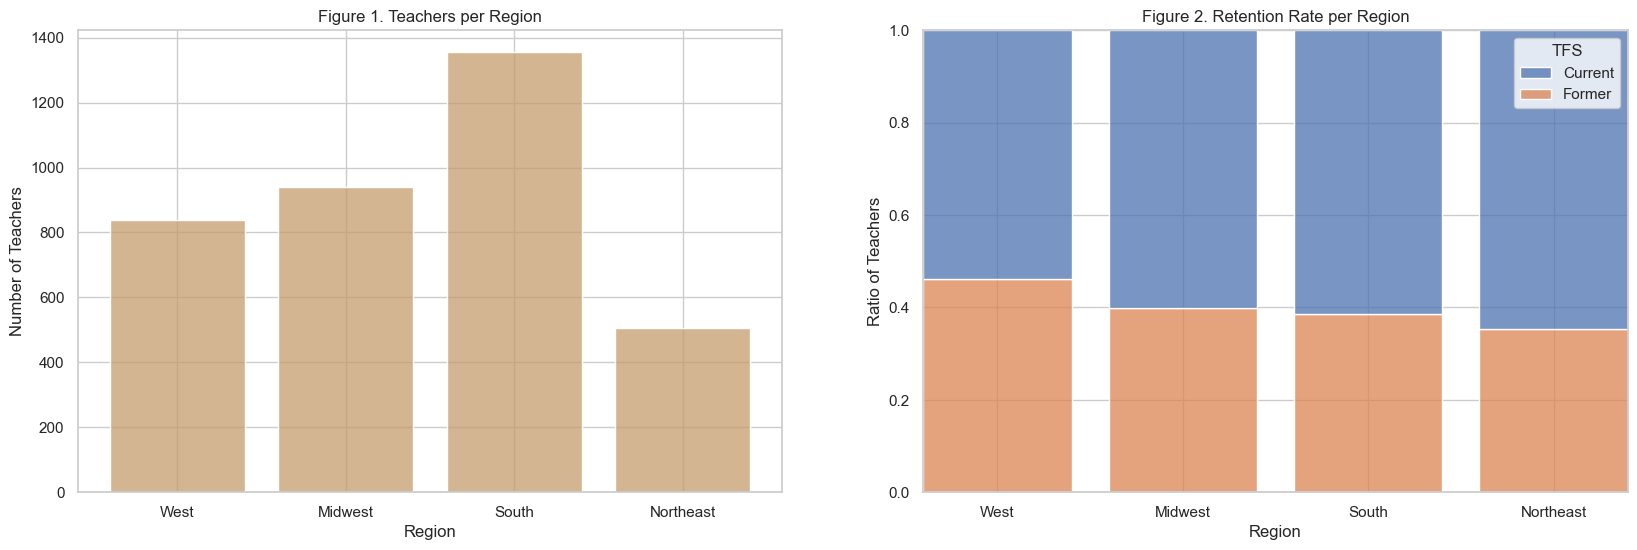

In [5]:
# sns.set(rc={'figure.figsize':(10,10)})
sns.set_theme(style='whitegrid', palette='deep')

fig, axes=plt.subplots(1,2, figsize=(20,6))
sns.histplot(ax=axes[0], data=df, x='region_txt', shrink=0.8, color='#c69c6d')
axes[0].set(xlabel='Region', ylabel='Number of Teachers', title='Figure '+str(fig_index)+'. Teachers per Region')
fig_index+=1
sns.histplot(ax=axes[1], data=df, x='region_txt',hue='TFS', multiple='fill', hue_order=['Current', 'Former'], shrink=0.8)
axes[1].set(xlabel='Region', ylabel='Ratio of Teachers', title='Figure '+str(fig_index)+'. Retention Rate per Region')
fig_index+=1
plt.show()

- Figure 1: the distirubtion of the number of teachers per each region, West, Midwest, Soudth, and, Northeast indicates the the survey has teachers working at South the most as its respoendants.

- Figure 2: the ratio of teachers turnover in each region shows that West region is the highest and Midwest > South > Northeast are following.

## Public Teacher: Demographic information ##
### gender, gender, race/ethnicity ### 

In [6]:
df['gender_txt']=df['GENDER'].apply(lambda x: 'Male' if x==1 else 'Female')
gender=df.groupby(['gender_txt', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
gender['total']=gender.groupby('gender_txt').transform(lambda x: x.sum())['CNTLNUM_T']

category={1: '< 30', 2: '30-39', 3: '40-49', 4: '>= 50'}
df['age_txt']=df['AGE_T'].map(category)
age=df.groupby(['age_txt', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
age['total']=age.groupby('age_txt').transform(lambda x: x.sum())['CNTLNUM_T']

category={1: 'American Indian', 2: 'Asian', 3: 'Black', 4: 'White', 5: 'Hispanic'}
df['race_txt']=df['RACETH_T'].map(category)

category={1: 'Non-White', 2: 'Non-White', 3: 'Non-White', 4: 'White', 5: 'Non-White'}
df['white_txt']=df['RACETH_T'].map(category)
white=df.groupby(['white_txt', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
white['total']=white.groupby('white_txt').transform(lambda x: x.sum())['CNTLNUM_T']

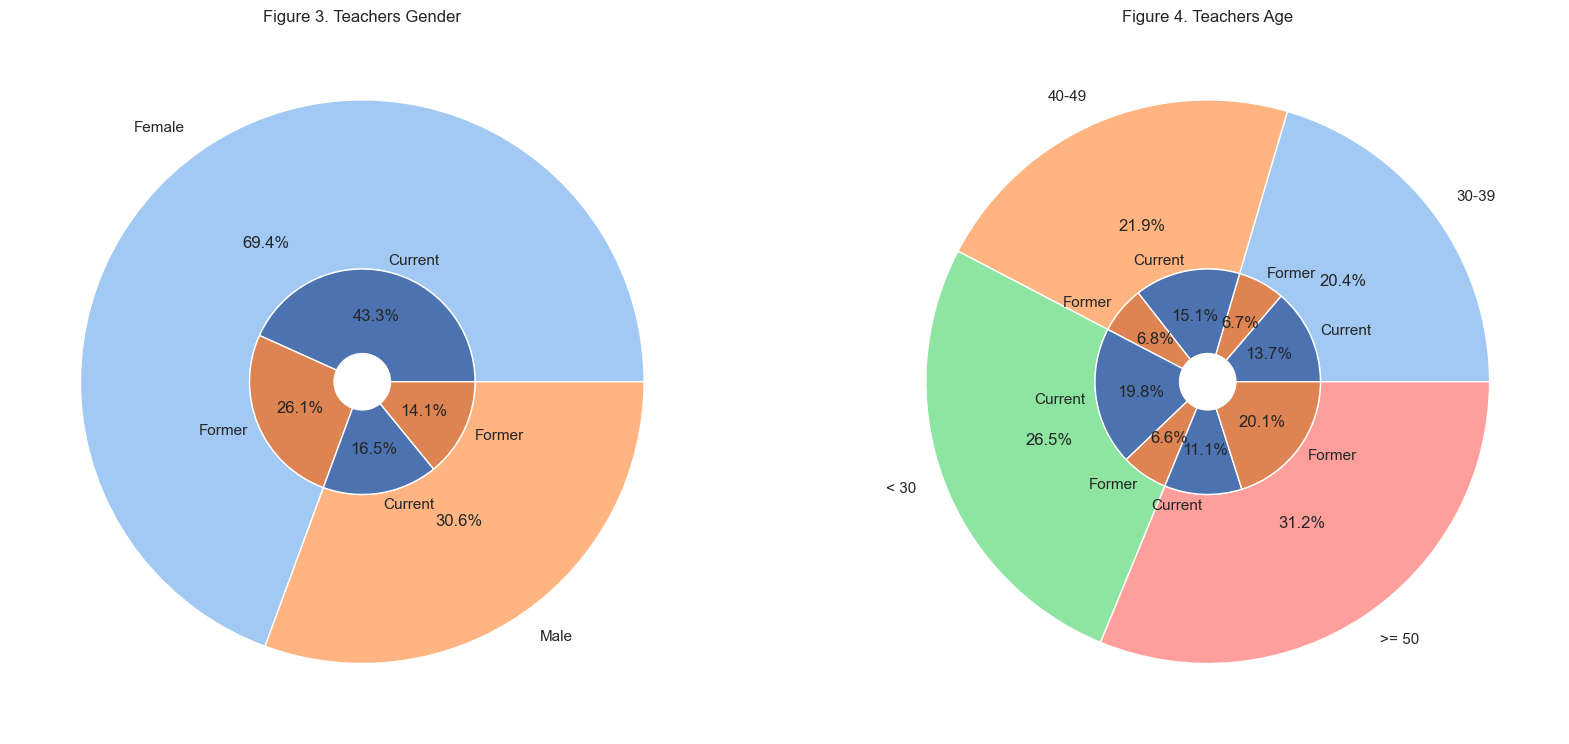

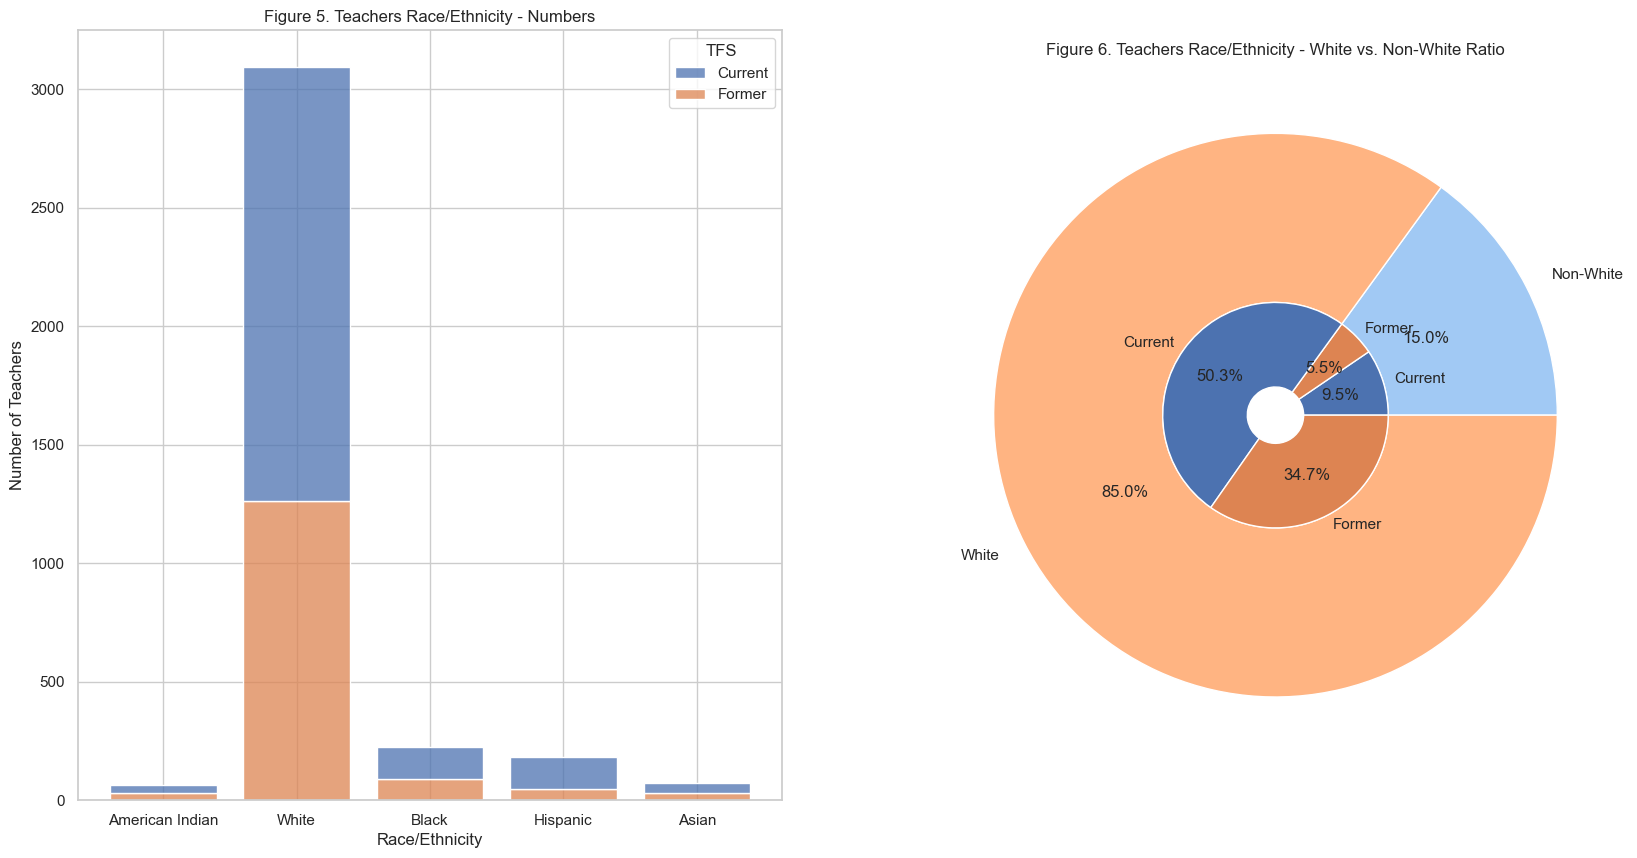

In [7]:
fig, axes=plt.subplots(1,2, figsize=(20,10))
size=0.6

colors=sns.color_palette('pastel')[:gender.gender_txt.nunique()]
axes[0].pie(gender.total.unique().tolist(), labels=gender.gender_txt.unique().tolist(), colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[0].pie(gender.CNTLNUM_T.tolist(), labels=gender.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[0].set(title='Figure '+str(fig_index)+'. Teachers Gender')
fig_index+=1

colors=sns.color_palette('pastel')[:age.age_txt.nunique()]
axes[1].pie(age.total.unique().tolist(), labels=age.age_txt.unique().tolist(), colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[1].pie(age.CNTLNUM_T.tolist(), labels=age.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[1].set(title='Figure '+str(fig_index)+'. Teachers Age')
fig_index+=1

fig, axes=plt.subplots(1,2, figsize=(20,10))
sns.histplot(ax=axes[0], data=df, x='race_txt', hue='TFS', multiple='stack', hue_order=['Current', 'Former'], shrink=0.8)
axes[0].set(xlabel='Race/Ethnicity', ylabel='Number of Teachers', title='Figure '+str(fig_index)+'. Teachers Race/Ethnicity - Numbers')
fig_index+=1

colors=sns.color_palette('pastel')[:white.white_txt.nunique()]
axes[1].pie(white.total.unique().tolist(), labels=white.white_txt.unique().tolist(), colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[1].pie(white.CNTLNUM_T.tolist(), labels=white.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[1].set(title='Figure '+str(fig_index)+'. Teachers Race/Ethnicity - White vs. Non-White Ratio')
fig_index+=1

plt.show()

- Figure 3: with the number of teachers, Current and Former, per gender, female teachers are around 2/3 of the teacher population, but the turnover is higher among the male teachers. 

- Figure 4: the age distribution of the teachers shows the teachers who are 50+ years are the majority of the teacher population and also the most likely quitting their job.

- Figure 5: the race categories except Hispanic are non-hispanic in this figure. White is the majority of the teachers.

- Figure 6: Figure 5 has been regenerated into White vs. Non-White ratio of teachers. The teachers ratention rate is higher for Non-White teachers.

  ###  marriage, salary, dependents, union ###

In [8]:
category={1: 'Married', 2: 'Widowed, \ndivorced, or separated', 3: 'Never married'}
df['marital_txt']=df['F0195'].map(category)
marital=df.groupby(['marital_txt', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
marital['total']=marital.groupby('marital_txt').transform(lambda x: x.sum())['CNTLNUM_T']

EARNALL=df.groupby(['EARNALL', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
EARNALL['total']=EARNALL.groupby('EARNALL').transform(lambda x: x.sum())['CNTLNUM_T']

EARNSCH=df.groupby(['EARNSCH', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
EARNSCH['total']=EARNSCH.groupby('EARNSCH').transform(lambda x: x.sum())['CNTLNUM_T']

labels=['< $30,000', '\$30,000-$39,999', '\$40,000-$49,999', '>= $50,000']

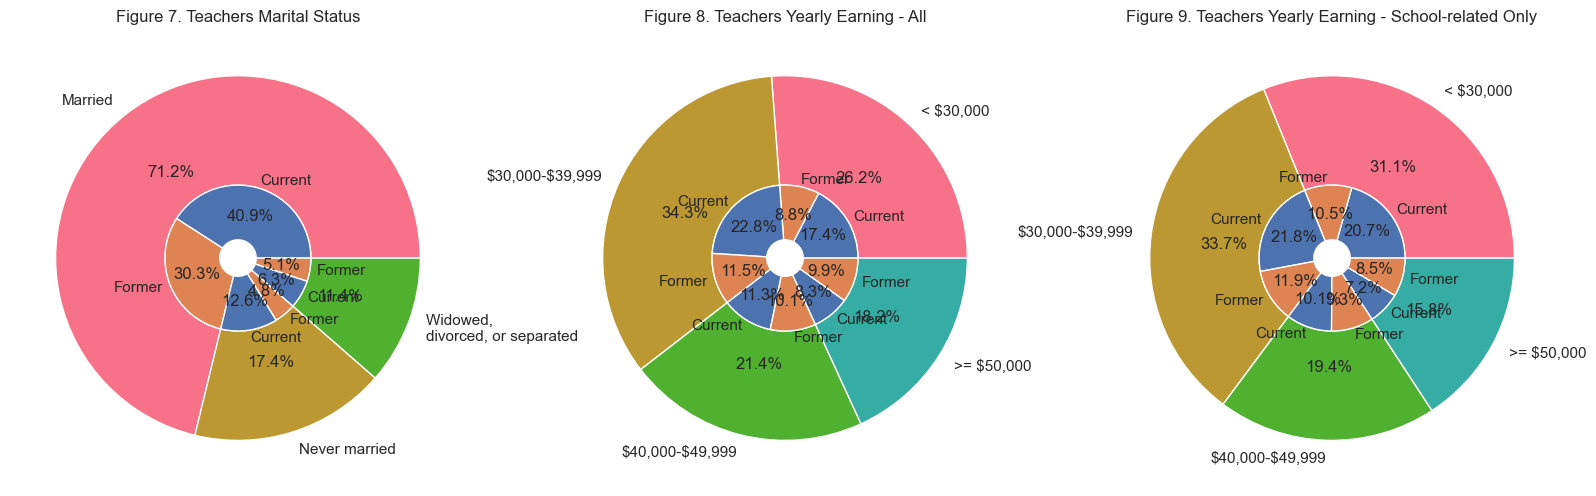

In [9]:
fig, axes=plt.subplots(1,3, figsize=(20,10))
size=0.6

colors=sns.color_palette('husl')[:marital.marital_txt.nunique()]
axes[0].pie(marital.total.unique().tolist(), labels=marital.marital_txt.unique().tolist(), colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[0].pie(marital.CNTLNUM_T.tolist(), labels=marital.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[0].set(title='Figure '+str(fig_index)+'. Teachers Marital Status')
fig_index+=1

colors=sns.color_palette('husl')[:EARNALL.EARNALL.nunique()]
axes[1].pie(EARNALL.total.unique().tolist(), labels=labels, colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[1].pie(EARNALL.CNTLNUM_T.tolist(), labels=EARNALL.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[1].set(title='Figure '+str(fig_index)+'. Teachers Yearly Earning - All')
fig_index+=1

colors=sns.color_palette('husl')[:EARNSCH.EARNSCH.nunique()]
axes[2].pie(EARNSCH.total.unique().tolist(), labels=labels, colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[2].pie(EARNSCH.CNTLNUM_T.tolist(), labels=EARNSCH.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[2].set(title='Figure '+str(fig_index)+'. Teachers Yearly Earning - School-related Only')
fig_index+=1

plt.show()

- Figure 7: Marital status asked when the TFS survey occurred shows Never married teachers have the highest retention rate. 

- Figure 8: Including all teaching-related and non-teaching jobs, teachers earning less than $40k have higher retention rate. 

- Figure 9: Including only teaching base salary and school/teaching related jobs, teachers earning less than $40k have higher retention rate.


In [10]:
category={0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: '5 or more', 6: '5 or more', 7: '5 or more', 8: '5 or more', 10: '5 or more', 12: '5 or more'}
df['dependents_txt']=df['F0196'].map(category)
dependents=df.groupby(['dependents_txt', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
dependents['total']=dependents.groupby('dependents_txt').transform(lambda x: x.sum())['CNTLNUM_T']

category={0: 0, 1: 1, 2: 2, 3: '3 or more', 4: '3 or more', 5: '3 or more'}
df['under_5_txt']=df['F0197'].map(category)
under_5=df.groupby(['under_5_txt', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
under_5['total']=under_5.groupby('under_5_txt').transform(lambda x: x.sum())['CNTLNUM_T']

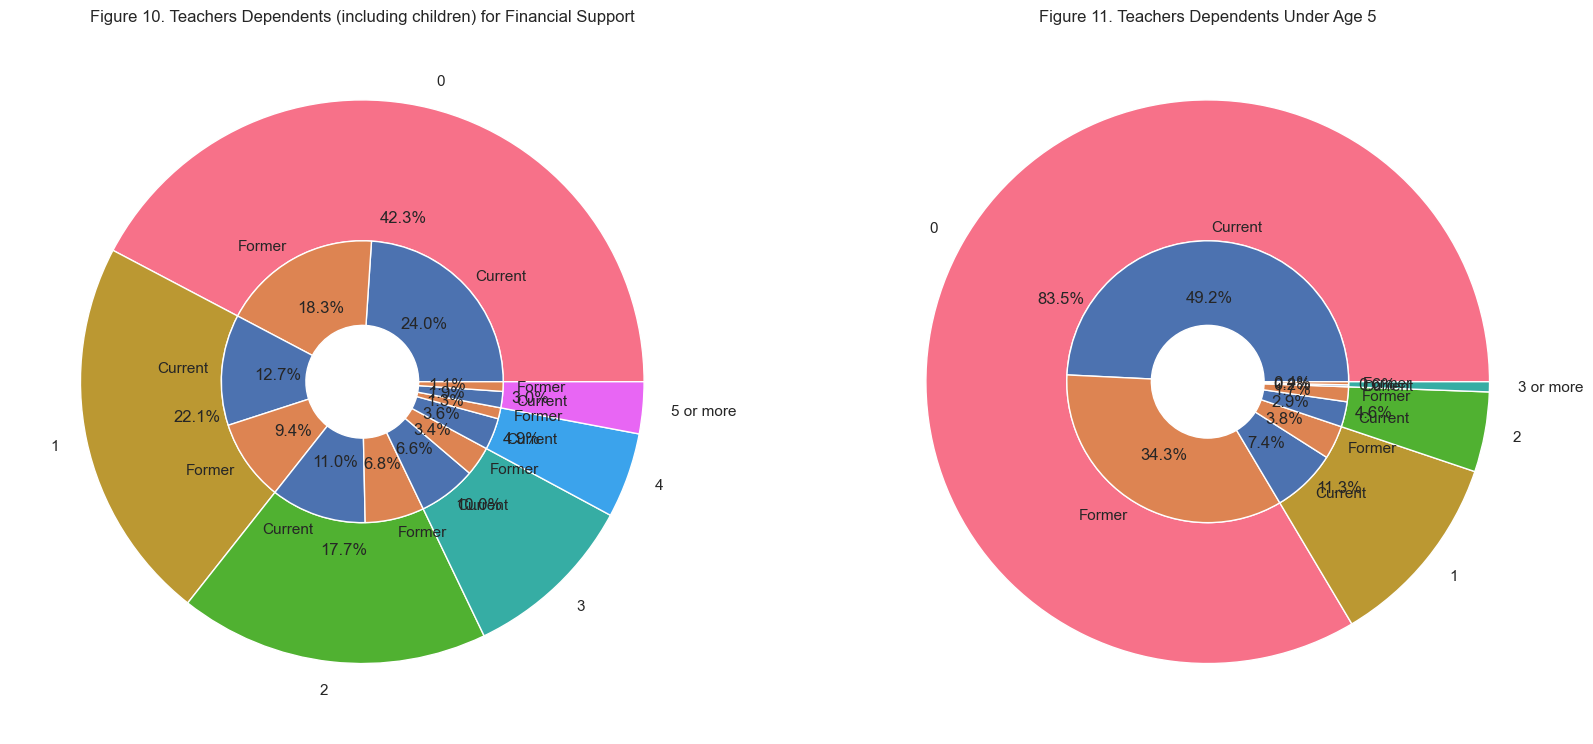

In [11]:
fig, axes=plt.subplots(1,2, figsize=(20,10))
size=0.5

colors=sns.color_palette('husl')[:dependents.dependents_txt.nunique()]
axes[0].pie(dependents.total.unique().tolist(), labels=dependents.dependents_txt.unique().tolist(), colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[0].pie(dependents.CNTLNUM_T.tolist(), labels=dependents.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[0].set(title='Figure '+str(fig_index)+'. Teachers Dependents (including children) for Financial Support')
fig_index+=1

colors=sns.color_palette('husl')[:under_5.under_5_txt.nunique()]
axes[1].pie(under_5.total.unique().tolist(), labels=under_5.under_5_txt.unique().tolist(), colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[1].pie(under_5.CNTLNUM_T.tolist(), labels=under_5.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[1].set(title='Figure '+str(fig_index)+'. Teachers Dependents Under Age 5')
fig_index+=1


- Figure 10: As the number of persons depending on teachers for more than half of their financial support increases, the retention rate increases as well. 

- Figure 11: As the number of children who are under 5 years old increases, the retention rate increases as well. 

In [12]:
union=df.groupby(['T0355', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
union['total']=union.groupby('T0355').transform(lambda x: x.sum())['CNTLNUM_T']

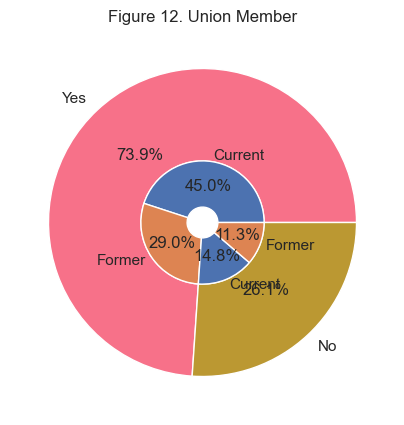

In [13]:
plt.figure(figsize=(5,5))
size=0.6

colors=sns.color_palette('husl')[:union.T0355.nunique()]
plt.pie(union.total.unique().tolist(), labels=['Yes', 'No'], colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
plt.pie(union.CNTLNUM_T.tolist(), labels=union.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
plt.title('Figure '+str(fig_index)+'. Union Member')
fig_index+=1
plt.show()


- Figure 12: More than 2/3 of teachers are a union member. The ratio of Current and Former teachers is not showing significant change between union or non-union teachers.


## Public Teacher: Education and Training ##
### certification, degree, major ###

In [14]:
category={1: 'Bachelors+Masters', 2: 'Bachelors Only', -8: 'No Bachelors'}
df['degree_txt']=df['T0080'].map(category)
degree=df.groupby(['T0070', 'degree_txt', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
degree['total_bach']=degree.groupby('T0070').transform(lambda x: x.sum())['CNTLNUM_T']
degree['total_master']=degree.groupby('degree_txt').transform(lambda x: x.sum())['CNTLNUM_T']

category={1: 'Regular/Standard/Advanced', 2: 'Probationary', 3: 'Provisional', 4: 'Temporary', 5: 'Emergency/Waiver', -8: 'No Certification'}
cert=df.groupby(['T0104', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
cert['total']=cert.groupby('T0104').transform(lambda x: x.sum())['CNTLNUM_T']
cert['T0104']=cert['T0104'].map(category)

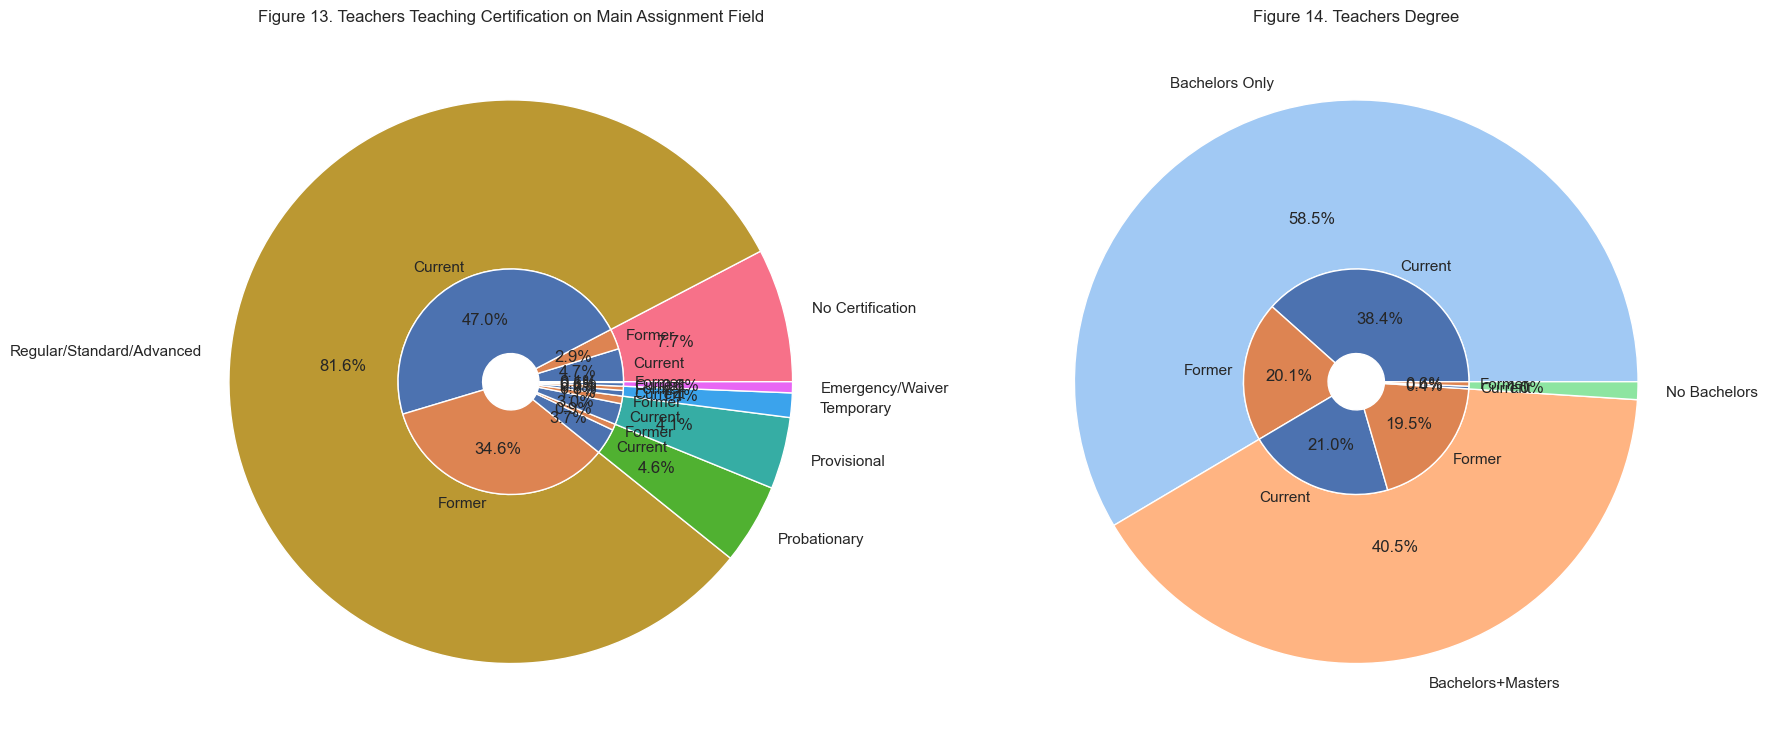

In [15]:
fig, axes=plt.subplots(1,2, figsize=(20,10))
size=0.6

colors=sns.color_palette('husl')[:cert.T0104.nunique()]
axes[0].pie(cert.total.unique().tolist(), labels=cert.T0104.unique().tolist(), colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[0].pie(cert.CNTLNUM_T.tolist(), labels=cert.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[0].set(title='Figure '+str(fig_index)+'. Teachers Teaching Certification on Main Assignment Field')
fig_index+=1

colors=sns.color_palette('pastel')[:degree.degree_txt.nunique()]
axes[1].pie(degree.total_master.unique().tolist(), labels=degree.degree_txt.unique().tolist(), colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[1].pie(degree.CNTLNUM_T.tolist(), labels=degree.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[1].set(title='Figure '+str(fig_index)+'. Teachers Degree')
fig_index+=1

plt.show()

- Figure 13: Over 80% of teachers have a Regular, Standard, or Advance certification on their main assignment field of study. But the rest of teachers having other or no certification have higher ratio of Current teachers.

- Figure 14: There are 10 questions related to teachers degree in the survey - 1st field of bachelor's, 2nd field of bachelor's, minor, master's, associate, 2nd bachelor's, 2nd master's, education special, advanced graduate certificate, and PhD. More than half of teachers have only bachelor's degree, and 40.5% of the teachers have Bachelor's and Master's degree. Also, the retention rate is higher the Bachelors-Only holders.

In [16]:
category={1: 'Education', 2: 'Education', 3: 'Education', 4: 'Education', 5: 'Education', 6: 'Education', 7: 'Education', 8: 'Education', 9: 'Education', 10: 'Education', 11: 'Education', 12: 'Education', 13: 'Education', 14: 'Education', 15: 'Education', 16: 'Education', 17: 'Education', 18: 'Education', 19: 'Education', 20: 'Education', 21: 'Education', 22: 'Education', 23: 'Education', 24: 'Education', 25: 'Education', 26: 'Education', 27: 'Education', 28: 'Education', 29: 'Education', 30: 'Education', 31: 'Education', 32: 'Education', 33: 'Education', 34: 'Education', 35: 'Education', 36: 'Education', 37: 'Education', 38: 'Education', 39: 'Education', 40: 'Education', 41: 'Education', 42: 'Education', 43: 'Education', 44: 'Education', 45: 'General - Non-STEM', 46: 'General - Non-STEM', 47: 'General - Non-STEM', 48: 'General - Non-STEM', 49: 'General - Non-STEM', 50: 'General - Non-STEM', 51: 'General - Non-STEM', 52: 'General - Non-STEM', 53: 'General - Non-STEM', 54: 'General - Non-STEM', 55: 'General - Non-STEM', 56: 'General - Non-STEM', 57: 'General-STEM', 58: 'General-STEM', 59: 'General-STEM', 60: 'General-STEM', 61: 'General-STEM', 62: 'General-STEM', 63: 'General-STEM', 64: 'General - Non-STEM', 65: 'General - Non-STEM', 66: 'General - Non-STEM', 67: 'General - Non-STEM', 68: 'General - Non-STEM', 69: 'General - Non-STEM', 70: 'General - Non-STEM', 71: 'General - Non-STEM', 72: 'General - Non-STEM', 73: 'General - Non-STEM', 74: 'General - Non-STEM', 75: 'General - Non-STEM', 76: 'General - Non-STEM', 77: 'General - Non-STEM', 78: 'General - Non-STEM', 79: 'General - Non-STEM', 80: 'General - Non-STEM', 81: 'General - Non-STEM', 82: 'General - Non-STEM', 83: 'General - Non-STEM', 84: 'General - Non-STEM', 85: 'General - Non-STEM', 86: 'General - Non-STEM', 87: 'General - Non-STEM', 88: 'All Other Areas'}
df['major_bach']=df['T0072'].map(category)
major_bach=df.groupby(['major_bach', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
major_bach['total']=major_bach.groupby('major_bach').transform(lambda x: x.sum())['CNTLNUM_T']

df['major_master']=df['T0081'].map(category)
major_master=df.groupby(['major_master', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
major_master['total']=major_master.groupby('major_master').transform(lambda x: x.sum())['CNTLNUM_T']

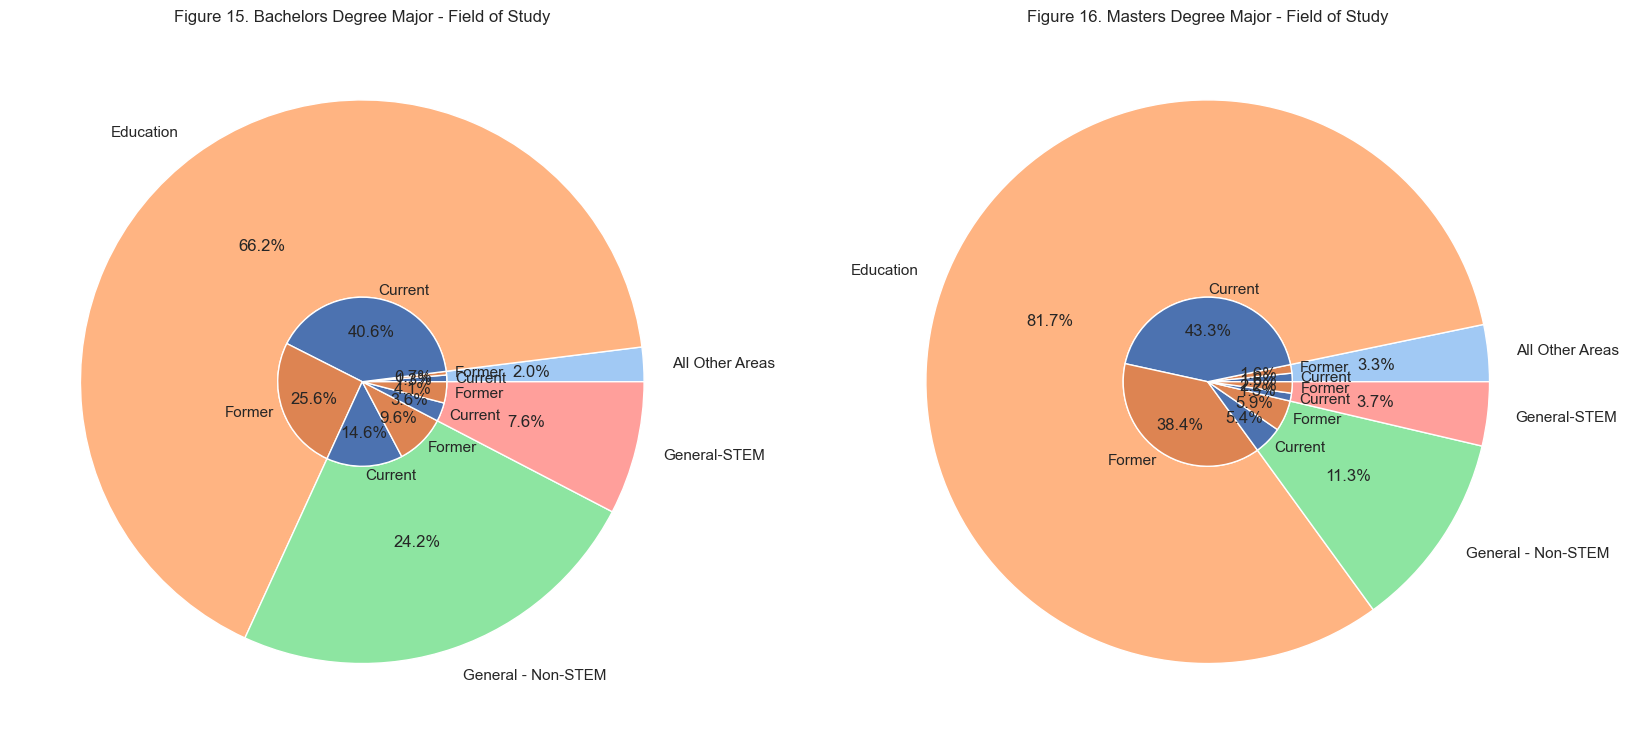

In [17]:
fig, axes=plt.subplots(1,2, figsize=(20,10))
size=0.7

colors=sns.color_palette('pastel')[:major_bach.major_bach.nunique()]
axes[0].pie(major_bach.total.unique().tolist(), labels=major_bach.major_bach.unique().tolist(), colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[0].pie(major_bach.CNTLNUM_T.tolist(), labels=major_bach.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[0].set(title='Figure '+str(fig_index)+'. Bachelors Degree Major - Field of Study')
fig_index+=1

colors=sns.color_palette('pastel')[:major_master.major_master.nunique()]
axes[1].pie(major_master.total.unique().tolist(), labels=major_master.major_master.unique().tolist(), colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[1].pie(major_master.CNTLNUM_T.tolist(), labels=major_master.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[1].set(title='Figure '+str(fig_index)+'. Masters Degree Major - Field of Study')
fig_index+=1

plt.show()

Figure 15 and 16 shows the degree categories of Bechelor's and Master's degree respetively. The survey has 88 different codes for the filed of study that are recagorized as Education, STEM, or Non-STEM. 
As the teachers pursue their Master's degree, they tend to study Education - Other, Counseling and guidance, Curriculum and instruction, Educational administration/psychology, and Education - Special related to disabled students and mental health. STEM major teachers are likely leaving the job regardless of the degree.

## Public Teacher: Teaching Experience ##
### years, new teacher, subjects(STEM), grades ### 

In [18]:
df['newtch_txt']=df['NEWTCH'].apply(lambda x: '3 years or less' if x==1 else 'more than 3 years')
newtch=df.groupby(['newtch_txt', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
newtch['total']=newtch.groupby('newtch_txt').transform(lambda x: x.sum())['CNTLNUM_T']

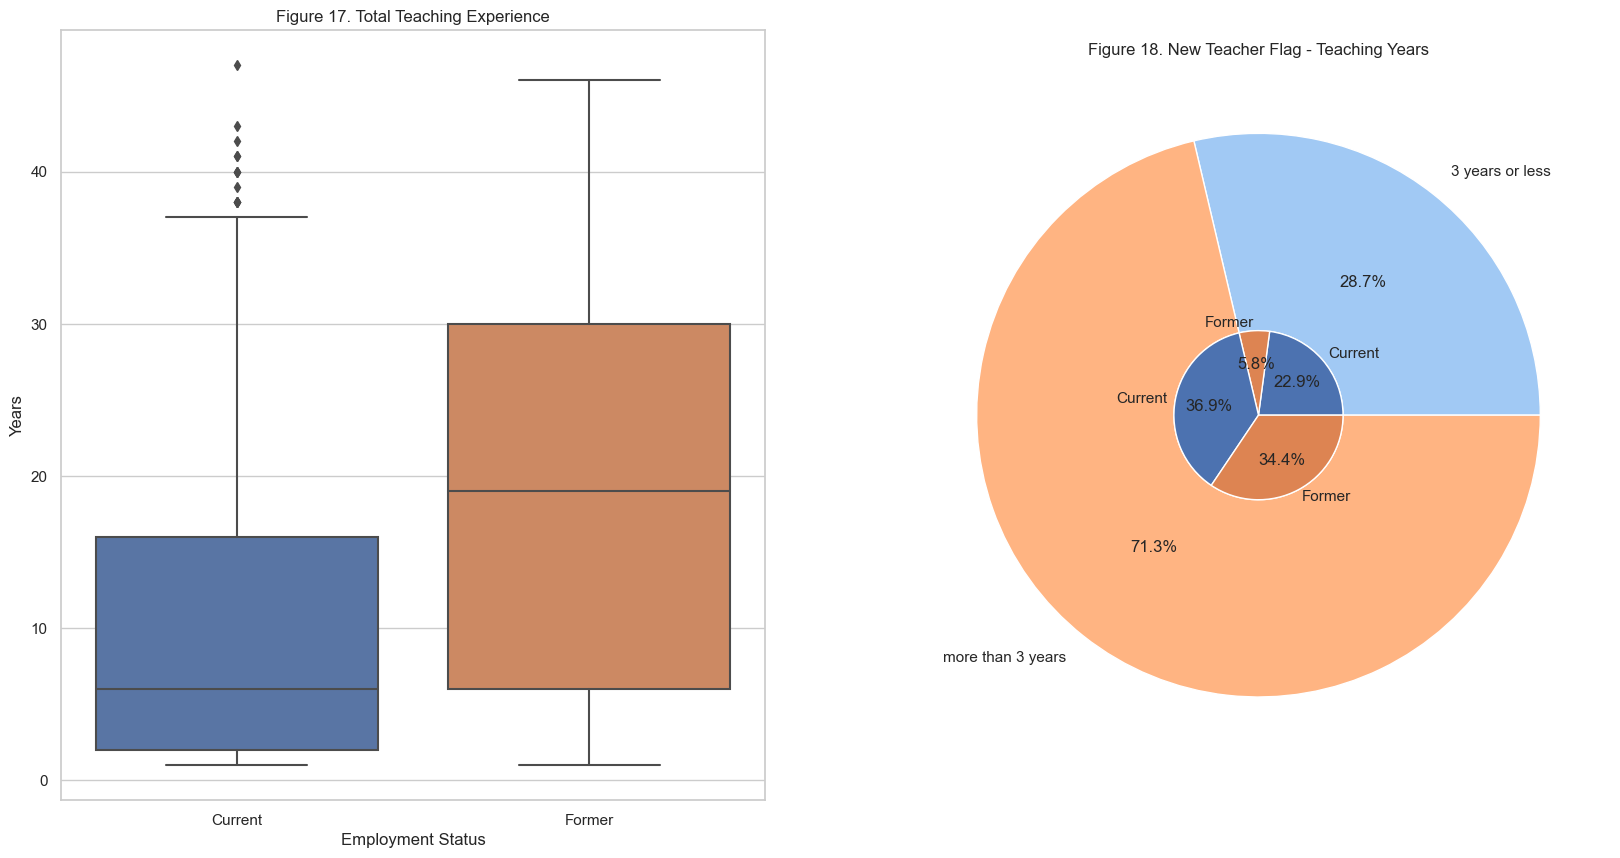

In [19]:
fig, axes=plt.subplots(1,2, figsize=(20,10))
size=0.7
sns.boxplot(ax=axes[0], data=df, x='TFS', y='TOTEXPER', order=['Current', 'Former'])
axes[0].set(xlabel='Employment Status', ylabel='Years', title='Figure '+str(fig_index)+'. Total Teaching Experience')
fig_index+=1

colors=sns.color_palette('pastel')[:newtch.newtch_txt.nunique()]
axes[1].pie(newtch.total.unique().tolist(), labels=newtch.newtch_txt.unique().tolist(), colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[1].pie(newtch.CNTLNUM_T.tolist(), labels=newtch.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[1].set(title='Figure '+str(fig_index)+'. New Teacher Flag - Teaching Years')
fig_index+=1

plt.show()

- Figure 17: Former teachers have longer years of teaching experience than Current teachers.

- Figure 18: Teachers working more than 3 years have significantly higher ratio of Former teachers.

In [20]:
category={1: 'General', 2: 'General', 3: 'General', 4: 'Special Areas', 5: 'Special Areas', 6: 'Special Areas', 7: 'Special Areas', 8: 'Special Areas', 9: 'Special Areas', 10: 'Special Areas', 11: 'Special Areas', 12: 'Special Areas', 13: 'Special Areas', 14: 'Special Areas', 15: 'Special Areas', 16: 'Special Areas', 17: 'Special Areas', 18: 'Special Areas', 19: 'Special Areas', 20: 'Special Areas', 21: 'Special Areas', 22: 'Special Areas', 23: 'English or Language Arts', 24: 'English or Language Arts', 25: 'English or Language Arts', 26: 'Foreign Languages', 27: 'Foreign Languages', 28: 'Foreign Languages', 29: 'Foreign Languages', 30: 'Foreign Languages', 31: 'Foreign Languages', 32: 'Science', 33: 'Science', 34: 'Science', 35: 'Science', 36: 'Science', 37: 'Science', 38: 'Science', 39: 'Vocational-Technical Education', 40: 'Vocational-Technical Education', 41: 'Vocational-Technical Education', 42: 'Vocational-Technical Education', 43: 'Vocational-Technical Education', 44: 'Vocational-Technical Education', 45: 'Vocational-Technical Education', 46: 'Vocational-Technical Education', 47: 'Vocational-Technical Education', 48: 'Vocational-Technical Education', 49: 'Special Education', 50: 'Special Education', 51: 'Special Education', 52: 'Special Education', 53: 'Special Education', 54: 'Special Education', 55: 'Special Education', 56: 'Special Education', 57: 'Special Education', 58: 'Special Education', 59: 'Special Education', 60: 'Special Education', 61: 'Special Education', 62: 'Special Education', 63: 'Special Education', 64: 'All Others'}
df['assign']=df['T0102'].map(category)

category_stem={1: 'Non-STEM', 2: 'Non-STEM', 3: 'Non-STEM', 4: 'Non-STEM', 5: 'Non-STEM', 6: 'Non-STEM', 7: 'Non-STEM', 8: 'Non-STEM', 9: 'Non-STEM', 10: 'Non-STEM', 11: 'Non-STEM', 12: 'Non-STEM', 13: 'Non-STEM', 14: 'Non-STEM', 15: 'Non-STEM', 16: 'STEM', 17: 'Non-STEM', 18: 'Non-STEM', 19: 'Non-STEM', 20: 'Non-STEM', 21: 'Non-STEM', 22: 'Non-STEM', 23: 'Non-STEM', 24: 'Non-STEM', 25: 'Non-STEM', 26: 'Non-STEM', 27: 'Non-STEM', 28: 'Non-STEM', 29: 'Non-STEM', 30: 'Non-STEM', 31: 'Non-STEM', 32: 'STEM', 33: 'STEM', 34: 'STEM', 35: 'STEM', 36: 'STEM', 37: 'STEM', 38: 'STEM', 39: 'Non-STEM', 40: 'Non-STEM', 41: 'Non-STEM', 42: 'Non-STEM', 43: 'Non-STEM', 44: 'Non-STEM', 45: 'Non-STEM', 46: 'Non-STEM', 47: 'Non-STEM', 48: 'Non-STEM', 49: 'Non-STEM', 50: 'Non-STEM', 51: 'Non-STEM', 52: 'Non-STEM', 53: 'Non-STEM', 54: 'Non-STEM', 55: 'Non-STEM', 56: 'Non-STEM', 57: 'Non-STEM', 58: 'Non-STEM', 59: 'Non-STEM', 60: 'Non-STEM', 61: 'Non-STEM', 62: 'Non-STEM', 63: 'Non-STEM', 64: 'Non-STEM'}
df['assign_stem']=df['T0102'].map(category_stem)
assign_stem=df.groupby(['assign_stem', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
assign_stem['total']=assign_stem.groupby('assign_stem').transform(lambda x: x.sum())['CNTLNUM_T']

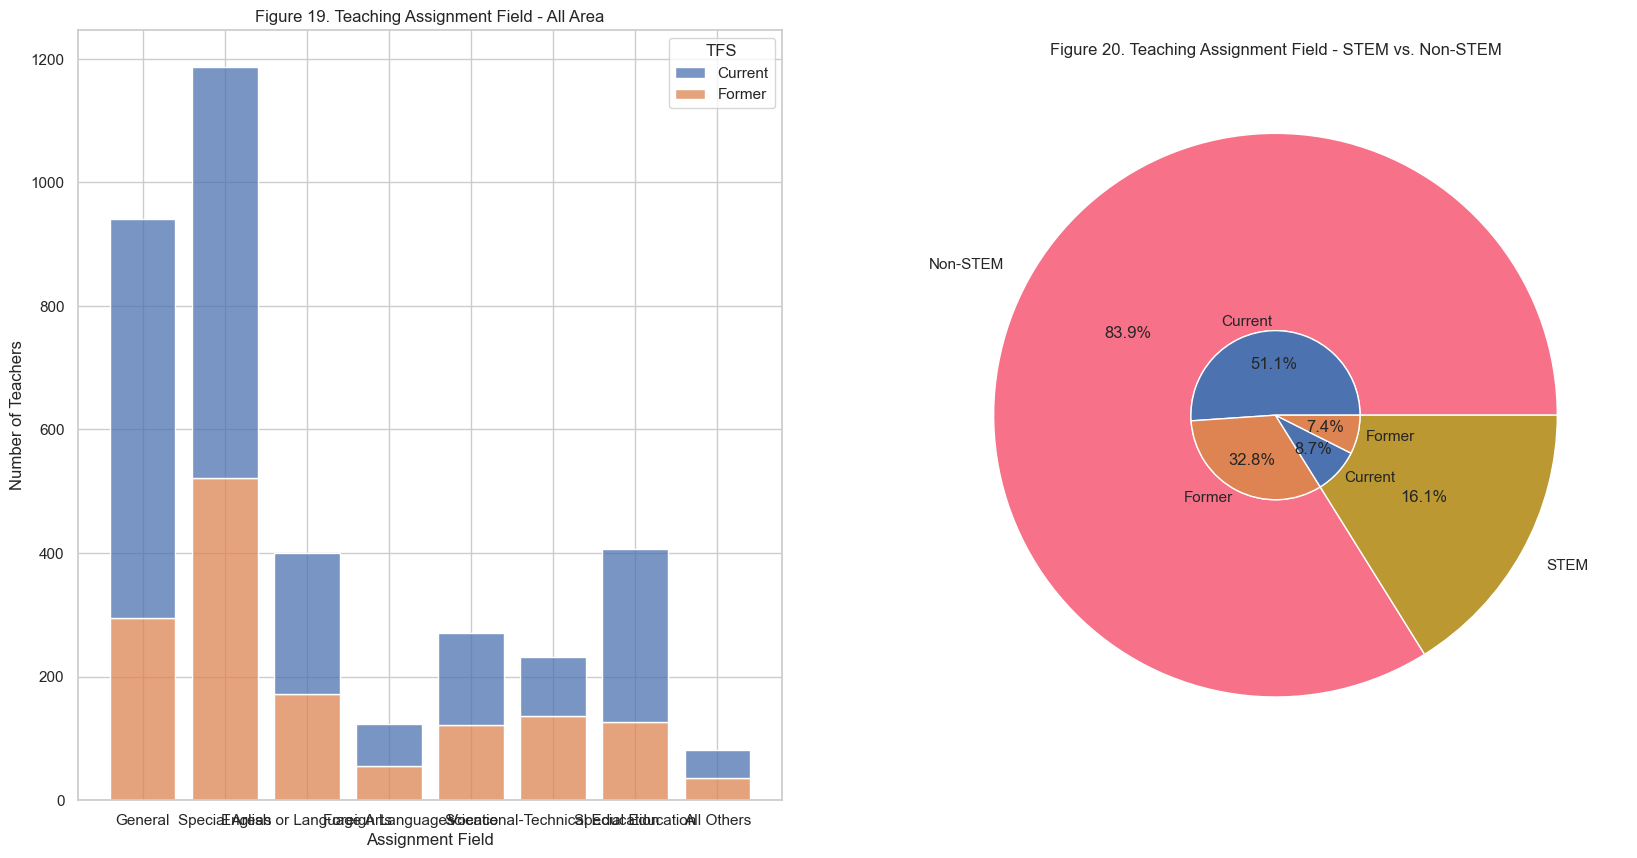

In [21]:
fig, axes=plt.subplots(1,2, figsize=(20,10))
size=0.7

# sns.set(rc={'figure.figsize':(20,10)})
sns.histplot(ax=axes[0], data=df.sort_values(by=['T0102']), x='assign', hue='TFS', multiple='stack', hue_order=['Current', 'Former'], shrink=0.8)
axes[0].set(xlabel='Assignment Field', ylabel='Number of Teachers', title='Figure '+str(fig_index)+'. Teaching Assignment Field - All Area')
fig_index+=1

colors=sns.color_palette('husl')[:assign_stem.assign_stem.nunique()]
axes[1].pie(assign_stem.total.unique().tolist(), labels=assign_stem.assign_stem.unique().tolist(), colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[1].pie(assign_stem.CNTLNUM_T.tolist(), labels=assign_stem.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[1].set(title='Figure '+str(fig_index)+'. Teaching Assignment Field - STEM vs. Non-STEM')
fig_index+=1

plt.show()

- Figure 19: The surey has 64 codes for the teaching assignment field of study that is recategorized into 8 different cateogories. The majority of teachers teach Special Areas including Art, Dance, Music, Mathmatics etc. and General including Pre-K, Kindergarten and Elementary. But, the highest turnover appears for Vocational-Technical education field.

- Figure 20: Figure 20 is recategorized again for STEM vs. non-STEM teachers for their teaching assignemnt field. STEM teachers are small population, 16%, but tend to have higher turnover rate.

In [22]:
cols=['T0191', 'T0192', 'T0193', 'T0194', 'T0195', 'T0196', 'T0197', 'T0198', 'T0199', 'T0200', 'T0201', 'T0202', 'T0203', 'T0204', 'T0205']

def df_sum(x):
    total=[1 for i in range(len(x)) if x[i]==1]
    return sum(total)

df['tch_grade_sum']=df[cols].apply(lambda x: df_sum(x), axis=1)
data=df[cols].apply(lambda x: df_sum(x), axis=0)
labels=['ungraded', 'PK', 'K', '1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th', '9th', '10th', '11th', '12th']

teacher_per_years=df.groupby(['tch_grade_sum', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})

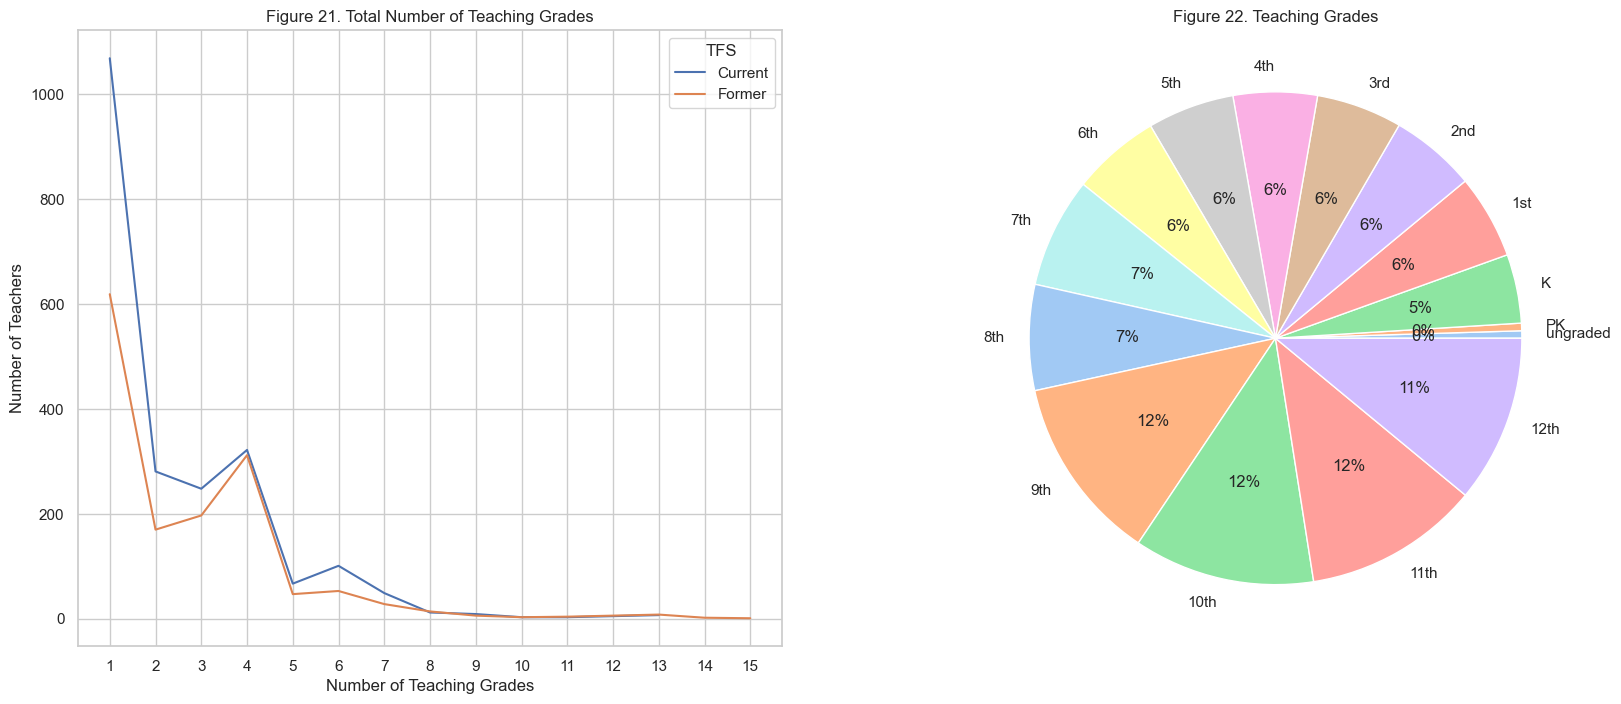

In [23]:
fig, axes=plt.subplots(1,2, figsize=(20,8))
# sns.set(rc={'figure.figsize':(10,10)})
sns.lineplot(ax=axes[0], data=teacher_per_years, x='tch_grade_sum', y='CNTLNUM_T', hue='TFS')
axes[0].set(xlabel='Number of Teaching Grades', ylabel='Number of Teachers', title='Figure '+str(fig_index)+'. Total Number of Teaching Grades')
axes[0].set(xticks=np.sort(df.tch_grade_sum.unique()))
fig_index+=1

colors=sns.color_palette('pastel')[0:15]
axes[1].pie(data, labels=labels, colors=colors, autopct='%.0f%%')
axes[1].set(title='Figure '+str(fig_index)+'. Teaching Grades')
fig_index+=1

plt.show()

- Figure 21: The distribution of theachers as per the number of grades the teachers are teaching shows shows similar pattern for both Current and Former teachers. The majority of teachers teach less than 3 grades at a time. 

- Figure 22: The ratio of teachers teaching each grade are increasing as the grade is going up.

###  class organization, full-time/part-time ###

In [24]:
category={1: 'Departmentalized', 2: 'Enrichment', 3: 'Self-Contained', 4: 'Team Teaching', 5: 'Pull-Out'}
cla_or=df.groupby(['T0206', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
cla_or['total']=cla_or.groupby('T0206').transform(lambda x: x.sum())['CNTLNUM_T']
cla_or['T0206']=cla_or['T0206'].map(category)

df['ftpt_txt']=df['FTPT_S'].apply(lambda x: 'Full-time' if x==1 else 'Part-time')
ftpt=df.groupby(['ftpt_txt', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
ftpt['total']=ftpt.groupby('ftpt_txt').transform(lambda x: x.sum())['CNTLNUM_T']

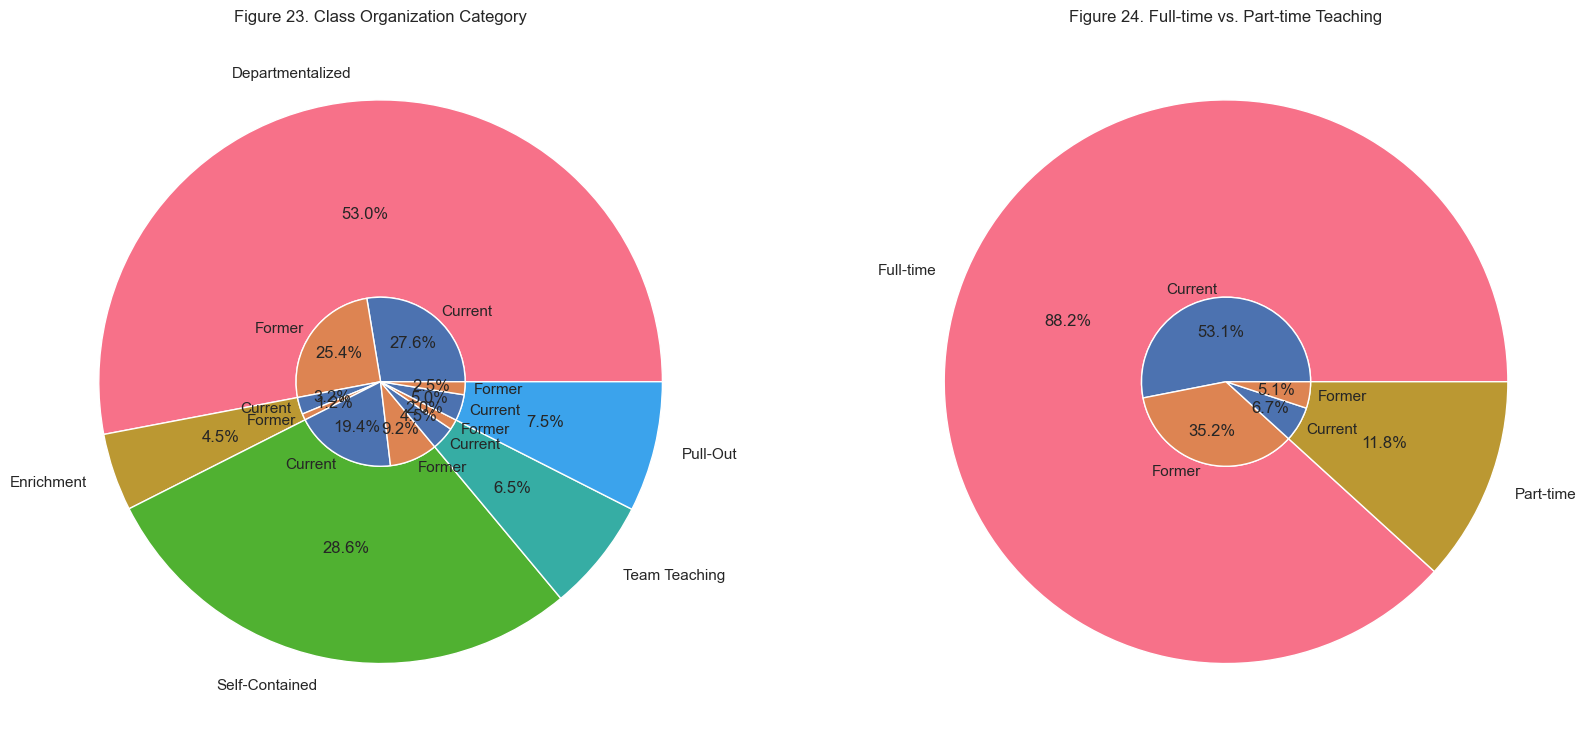

In [25]:
fig, axes=plt.subplots(1,2, figsize=(20,10))
size=0.7

colors=sns.color_palette('husl')[:cla_or.T0206.nunique()]
axes[0].pie(cla_or.total.unique().tolist(), labels=cla_or.T0206.unique().tolist(), colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[0].pie(cla_or.CNTLNUM_T.tolist(), labels=cla_or.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[0].set(title='Figure '+str(fig_index)+'. Class Organization Category')
fig_index+=1

colors=sns.color_palette('husl')[:ftpt.ftpt_txt.nunique()]
axes[1].pie(ftpt.total.unique().tolist(), labels=ftpt.ftpt_txt.unique().tolist(), colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[1].pie(ftpt.CNTLNUM_T.tolist(), labels=ftpt.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[1].set(title='Figure '+str(fig_index)+'. Full-time vs. Part-time Teaching')
fig_index+=1

plt.show()

- Figure 24: Teachers teaching specific subject matter courses, Departmentalized Instruction, show lower ratio of Current teachers compare to other types of class organization.

- Figure 25: While almost 90% of teachers are full-time employed, the retention rate is slightly higher for the part-time teachers.

## Public School: General information ##
### type, level, urbanicity ###

In [26]:
category={1: 'Regular', 3: 'Special\nProgram', 4: 'Special\nEducation', 5: 'Vocational/\nTechnical', 6: 'Alternative'}
df['pgmtype_txt']=df['PGMTYPE'].map(category)

category={1: 'Elementary', 2: 'Secondary', 3: 'Combined'}
schlevel=df.groupby(['SCHLEVEL', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
schlevel['total']=schlevel.groupby('SCHLEVEL').transform(lambda x: x.sum())['CNTLNUM_T']
schlevel['SCHLEVEL']=schlevel['SCHLEVEL'].map(category)

category={1: 'Large/mid size\ncentral city', 2: 'Urban fringe of \nlarge/mid-size city', 3: 'Small town/Rural'}
urbanic=df.groupby(['URBANIC', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
urbanic['total']=urbanic.groupby('URBANIC').transform(lambda x: x.sum())['CNTLNUM_T']
urbanic['URBANIC']=urbanic['URBANIC'].map(category)

category={1: 'Less than 5%', 2: '5-19%', 3: '20-49%', 4: '50% or more'}
minenr=df.groupby(['MINENR','TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
minenr['total']=minenr.groupby('MINENR').transform(lambda x: x.sum())['CNTLNUM_T']
minenr['MINENR']=minenr['MINENR'].map(category)

category={1: 'Less than 5%', 2: 'Less than 5%', 3: '5-19%', 4: '20-49%', 5: '50% or more', -9: 'N/A'}
df['mintch_txt']=df['MINTCH'].map(category)
mintch=df.groupby(['mintch_txt','TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
mintch['total']=mintch.groupby('mintch_txt').transform(lambda x: x.sum())['CNTLNUM_T']

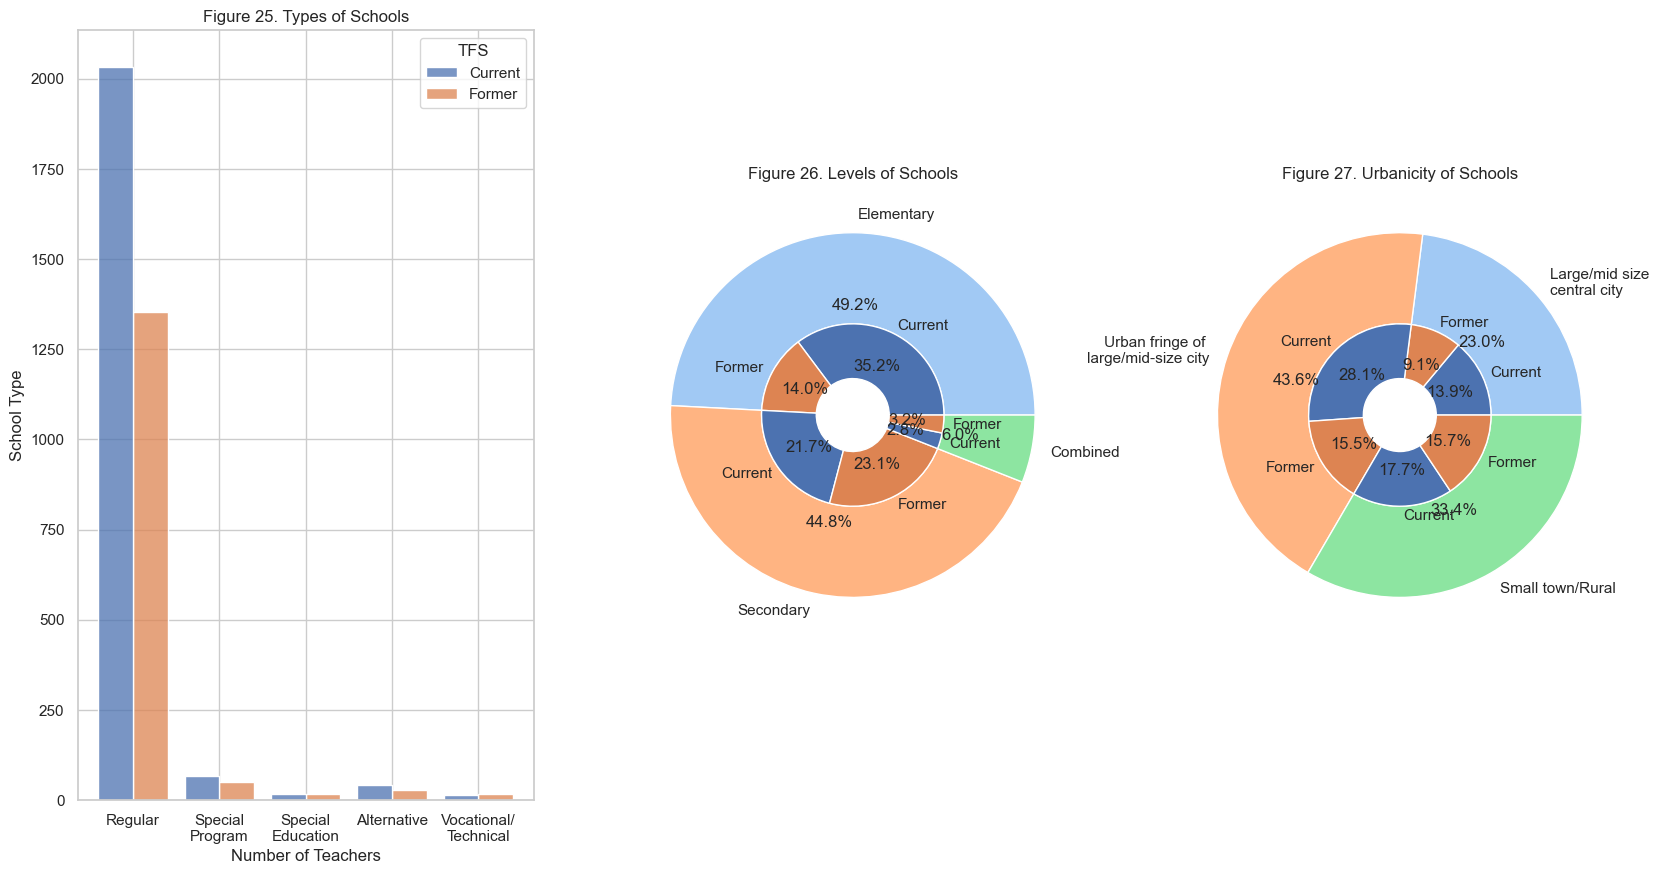

In [27]:
# sns.set(rc={'figure.figsize':(10,10)})
fig, axes=plt.subplots(1,3, figsize=(20,10))
size=0.5
sns.histplot(ax=axes[0], data=df, x='pgmtype_txt',hue='TFS', multiple='dodge', hue_order=['Current', 'Former'], shrink=0.8)
axes[0].set(xlabel='Number of Teachers', ylabel='School Type', title='Figure '+str(fig_index)+'. Types of Schools')
fig_index+=1

colors=sns.color_palette('pastel')[:schlevel.SCHLEVEL.nunique()]
axes[1].pie(schlevel.total.unique().tolist(), labels=schlevel.SCHLEVEL.unique().tolist(), colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[1].pie(schlevel.CNTLNUM_T.tolist(), labels=schlevel.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[1].set(title='Figure '+str(fig_index)+'. Levels of Schools')
fig_index+=1

colors=sns.color_palette('pastel')[:urbanic.URBANIC.nunique()]
axes[2].pie(urbanic.total.unique().tolist(), labels=urbanic.URBANIC.unique().tolist(), colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[2].pie(urbanic.CNTLNUM_T.tolist(), labels=urbanic.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[2].set(title='Figure '+str(fig_index)+'. Urbanicity of Schools')
fig_index+=1

plt.show()

- Figure 25: The most of teachers are working at Regular school, and its Former teacher ratio is also the highest. 

- Figure 26: Teachers working at Secondary schools have more Former teachers than Current teachers. 

- Figure 27: Teachers working at Small town or Rural area have the highest turnover rate.

 ### minority students and teachers ###

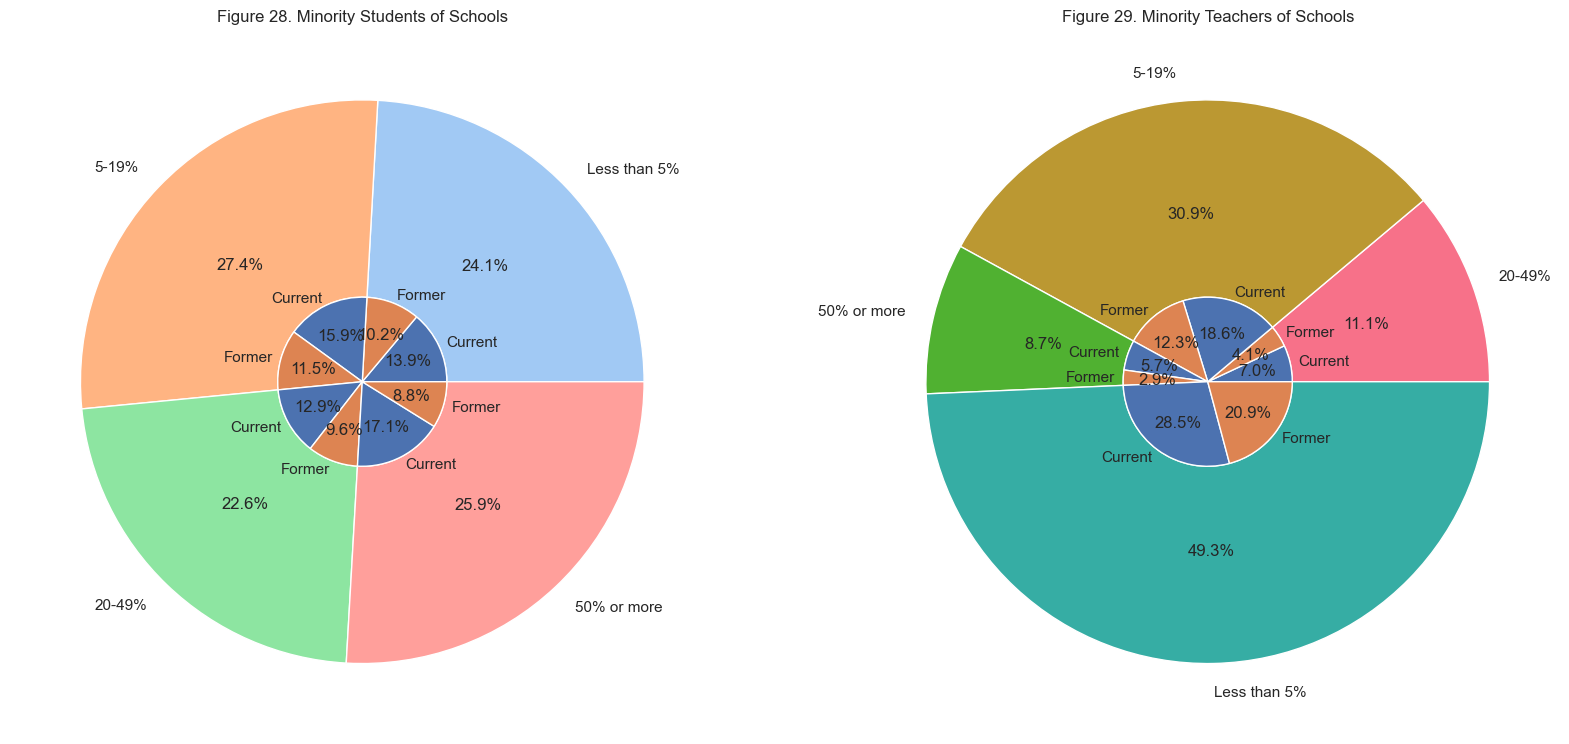

In [28]:
# sns.set(rc={'figure.figsize':(10,10)})
fig, axes=plt.subplots(1,2, figsize=(20,10))
size=0.7

colors=sns.color_palette('pastel')[:minenr.MINENR.nunique()]
axes[0].pie(minenr.total.unique().tolist(), labels=minenr.MINENR.unique().tolist(), colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[0].pie(minenr.CNTLNUM_T.tolist(), labels=minenr.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[0].set(title='Figure '+str(fig_index)+'. Minority Students of Schools')
fig_index+=1

colors=sns.color_palette('husl')[:mintch.mintch_txt.nunique()]
axes[1].pie(mintch.total.unique().tolist(), labels=mintch.mintch_txt.unique().tolist(), colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[1].pie(mintch.CNTLNUM_T.tolist(), labels=mintch.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[1].set(title='Figure '+str(fig_index)+'. Minority Teachers of Schools')
fig_index+=1

plt.show()

For Figure 28 and 29, the minority students and teachers are consist of Hispanic(regardless of race), Black(non Hispanic), American Indian or Alaska Native(non Hispanic), and Asian or Pacific Islander. Generally, schools have diverse distribution of race and ethnicity among students than teachers as the half of teachers works at the schools with less than 5% of minority teachers. The schools with largest population of minority students and teachers have the smallest ratio of Former teachers.

###  Student-Teacher Ratio ###

In [29]:
stu_tch=df[['STU_TCH','TFS']].copy()
stu_tch.drop([stu_tch[stu_tch.STU_TCH==745.60].index][0], inplace=True)
stu_desc=pd.DataFrame({'Current': stu_tch[stu_tch.TFS=='Current'].describe()['STU_TCH'], 'Former': stu_tch[stu_tch.TFS=='Former'].describe()['STU_TCH']})

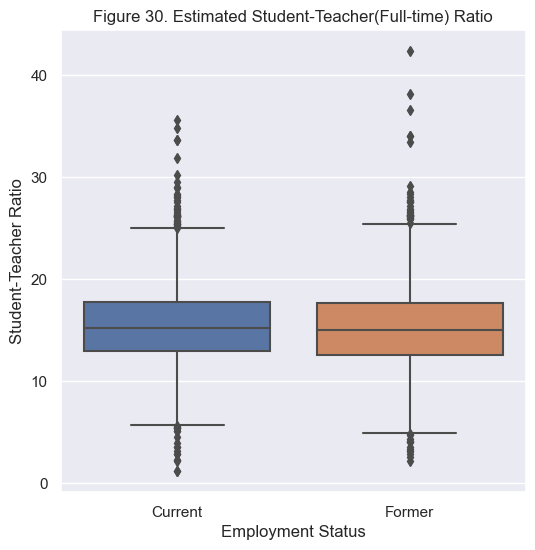

,Current,Former
count,2175.000000,1464.000000
mean,15.425030,15.278265
std,4.056818,4.371663
min,1.150000,2.190000
25%,12.920000,12.520000
50%,15.210000,15.030000
75%,17.760000,17.662500
max,35.610000,42.350000


In [30]:
sns.set(rc={'figure.figsize':(6,6)})
fig=sns.boxplot(data=stu_tch, x='TFS', y='STU_TCH', order=['Current', 'Former'])
fig.set(xlabel='Employment Status', ylabel='Student-Teacher Ratio', title='Figure '+str(fig_index)+'. Estimated Student-Teacher(Full-time) Ratio')
fig_index+=1
plt.show()
stu_desc

Figure 30 indicates there is very little, almost none, difference in distributions of the student-teach ratio with respect to Current and Former teachers.

## Public School: Poverty Proxy ##
### Title 1 ###

In [31]:
title1=df.groupby(['S0288', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
title1['total']=title1.groupby('S0288').transform(lambda x: x.sum())['CNTLNUM_T']
title1['S0288']=title1['S0288'].apply(lambda x: 'Yes' if x==1 else 'No')

num_title1=df.S0288.value_counts()[1]
num_non_title1=df.S0288.value_counts()[2]
num_TAS=df.S0290.value_counts().sum()-df.S0290.value_counts()[-8]
num_SWP=num_title1-num_TAS

data1=[num_non_title1, num_TAS, num_SWP]
labels1=['Non Title 1', ' Targeted Assistance', 'Schoolwide']

In [32]:
def df_check_yes(x):
    total=[1 for i in range(len(x)) if x[i]==1]
    return 1 if (sum(total)==len(x)) else 2

def df_check_no(x):
    total=[x[i] for i in range(len(x))]
    return 1 if (sum(total)==len(x)*2) else 2

cols=np.array(['S0306', 'S0307', 'S0308'])
label=np.array(['Reading', 'Math', 'ESL'])
label_idx=[[0,1,2], [0,1], [0,2], [1,2], [0], [1], [2]]
labels2=[]

for i in label_idx:
    temp=np.array_str(label[i])
    temp=temp[2:-2].replace("' '","+")
    labels2.append(temp)    
    df[temp]=df[cols[i]].apply(lambda x: df_check_yes(x), axis=1)

labels2.append('Other_Services')
df['Other_Services']=df[cols].apply(lambda x: df_check_no(x), axis=1)

data2=[df[i].value_counts()[1] for i in labels2]

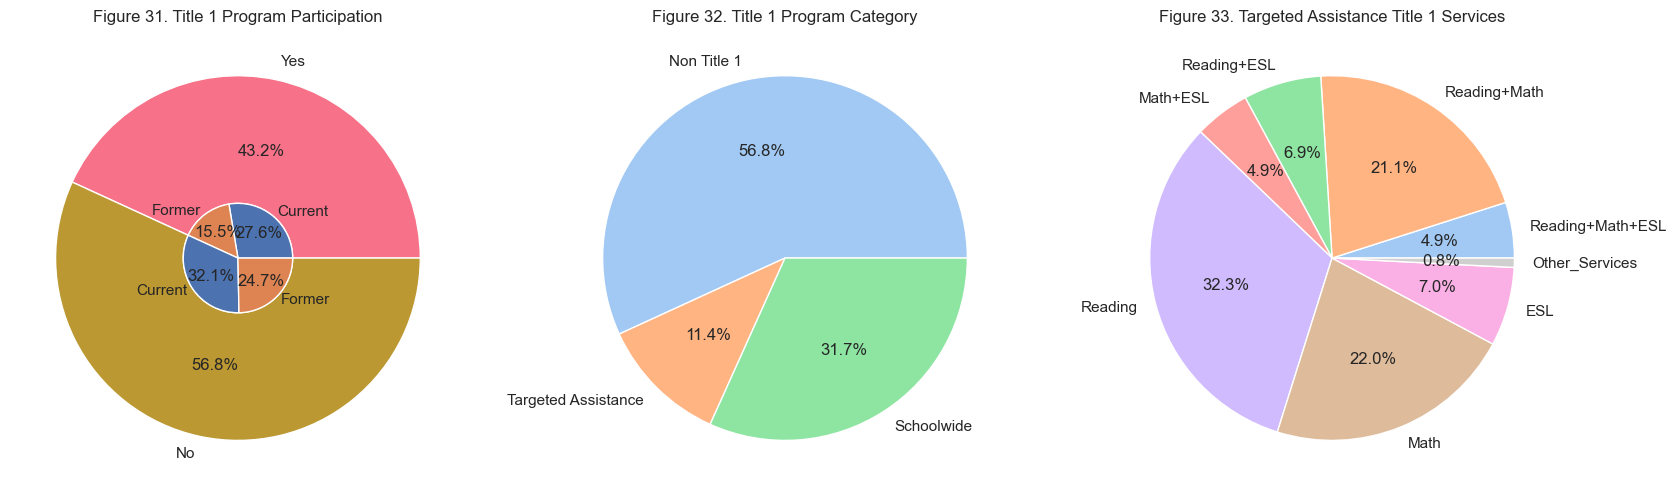

In [33]:
fig, axes=plt.subplots(1,3, figsize=(20,10))

colors=sns.color_palette('husl')[:title1.S0288.nunique()]
axes[0].pie(title1.total.unique().tolist(), labels=title1.S0288.unique().tolist(), colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[0].pie(title1.CNTLNUM_T.tolist(), labels=title1.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[0].set(title='Figure '+str(fig_index)+'. Title 1 Program Participation')
fig_index+=1

colors=sns.color_palette('pastel')[0:3]
axes[1].pie(data1, labels=labels1, colors=colors, autopct='%1.1f%%')
axes[1].set(title='Figure '+str(fig_index)+'. Title 1 Program Category')
fig_index+=1

colors=sns.color_palette('pastel')[0:8]
axes[2].pie(data2, labels=labels2, colors=colors, autopct='%1.1f%%')
axes[2].set(title='Figure '+str(fig_index)+'. Targeted Assistance Title 1 Services')
fig_index+=1

plt.show()

- Figure 31: Title 1 schools have higher ratio of Current teachers while more than half of schools do not paricipate Title 1 program at all.

- Figure 32: 31.7% of schools receive schoolwide Title 1 services, and 11.4% of them have Targeted Assistance Title 1 services. 

- Figure 33: The survey asked whether the Targeted Assistance are belong the 3 categories of the Title 1 services - Reading/Language Arts, Mathematics, and ESL. Among those 11.4% of schools, Reading and Math are the major services, and the schools receiving ESL service are 23.7%(4.9+6.9+4.9+7.0).

###  FRPL, NPL ###

In [34]:
FRPL=df.groupby(['S0282', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
FRPL['total']=FRPL.groupby('S0282').transform(lambda x: x.sum())['CNTLNUM_T']
FRPL['S0282']=FRPL['S0282'].apply(lambda x: 'Yes' if x==1 else 'No' if x==2 else 'Don\'t Know')

In [35]:
df['S0285_txt']=df['S0285'].apply(lambda x: 'Yes' if x==1 else 'No' if x==2 else 'No')
NLP=df.groupby(['S0285_txt', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
NLP['total']=NLP.groupby('S0285_txt').transform(lambda x: x.sum())['CNTLNUM_T']

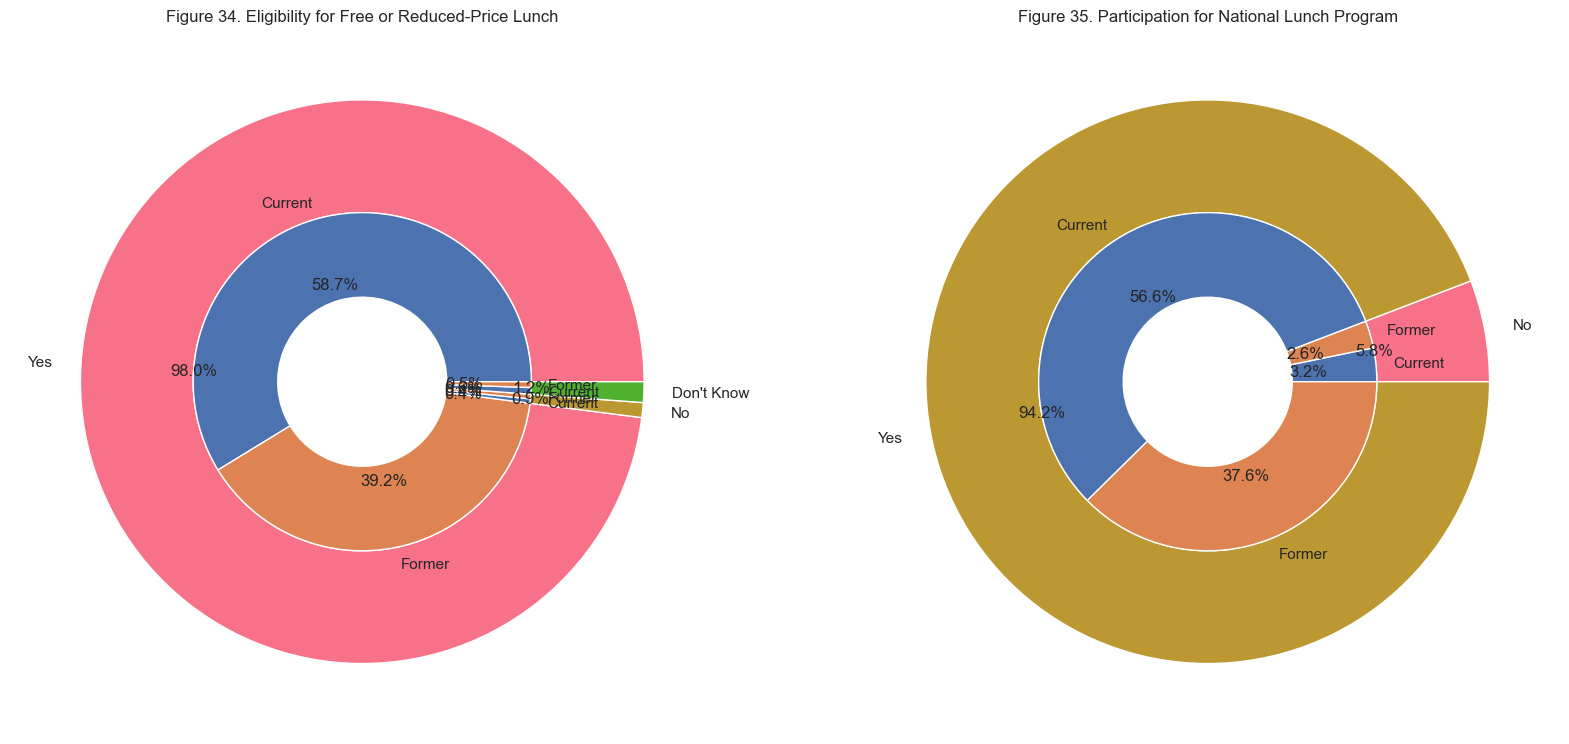

In [36]:
fig, axes=plt.subplots(1,2, figsize=(20,10))
size=0.4

colors=sns.color_palette('husl')[:FRPL.S0282.nunique()]
axes[0].pie(FRPL.total.unique().tolist(), labels=FRPL.S0282.unique().tolist(), colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[0].pie(FRPL.CNTLNUM_T.tolist(), labels=FRPL.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[0].set(title='Figure '+str(fig_index)+'. Eligibility for Free or Reduced-Price Lunch')
fig_index+=1

colors=sns.color_palette('husl')[:NLP.S0285_txt.nunique()]
axes[1].pie(NLP.total.unique().tolist(), labels=NLP.S0285_txt.unique().tolist(), colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[1].pie(NLP.CNTLNUM_T.tolist(), labels=NLP.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[1].set(title='Figure '+str(fig_index)+'. Participation for National Lunch Program')
fig_index+=1

plt.show()

- Figure 34: 98% of schools have at least 1 student eligible for free or reduced-priced lunches regardless of the National School Lunch program or other.

- Figure 35: 94% of schools participate the National School Lunch Program, and the retention rate is little higher on those 94% schools.

## Public Principal: Demographic information  ##
### gender, age, race/ethnicity ###

In [37]:
gender=df.groupby(['A0227', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
gender['total']=gender.groupby('A0227').transform(lambda x: x.sum())['CNTLNUM_T']
gender['A0227']=gender['A0227'].apply(lambda x: 'Male' if x==1 else 'Female')

category={1: '< 40', 2: '40-44', 3: '45-49', 4: '50-54', 5: '>= 55'}
age=df.groupby(['AGE_P', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
age['total']=age.groupby('AGE_P').transform(lambda x: x.sum())['CNTLNUM_T']
age['AGE_P']=age['AGE_P'].map(category)

category={1: 'American Indian', 2: 'Asian', 3: 'Black', 4: 'White', 5: 'Hispanic'}
df['raceth_p_txt']=df['RACETH_P'].map(category)

category={1: 'Non-White', 2: 'Non-White', 3: 'Non-White', 4: 'White', 5: 'Non-White'}
df['white_p_txt']=df['RACETH_T'].map(category)
white=df.groupby(['white_p_txt', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
white['total']=white.groupby('white_p_txt').transform(lambda x: x.sum())['CNTLNUM_T']

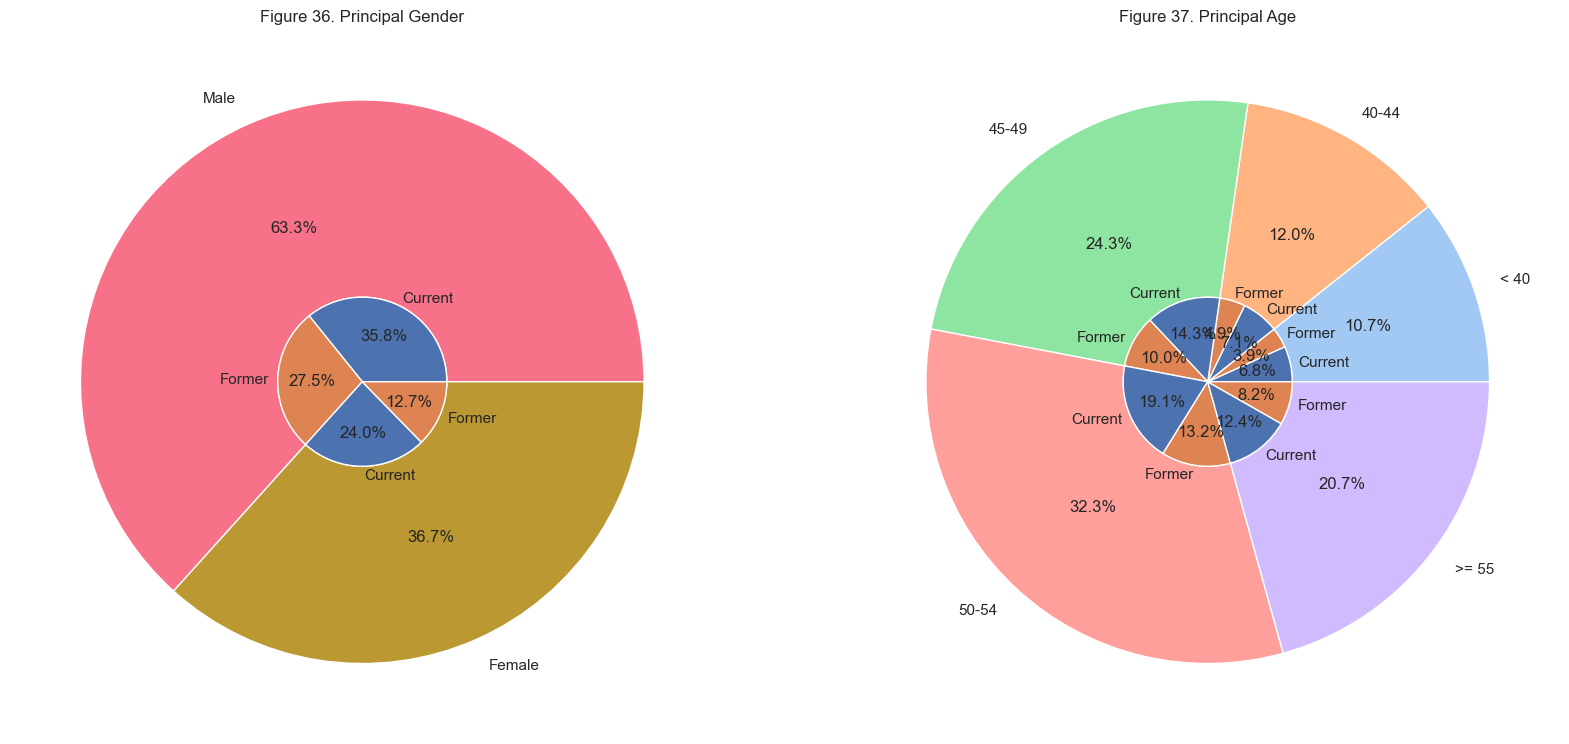

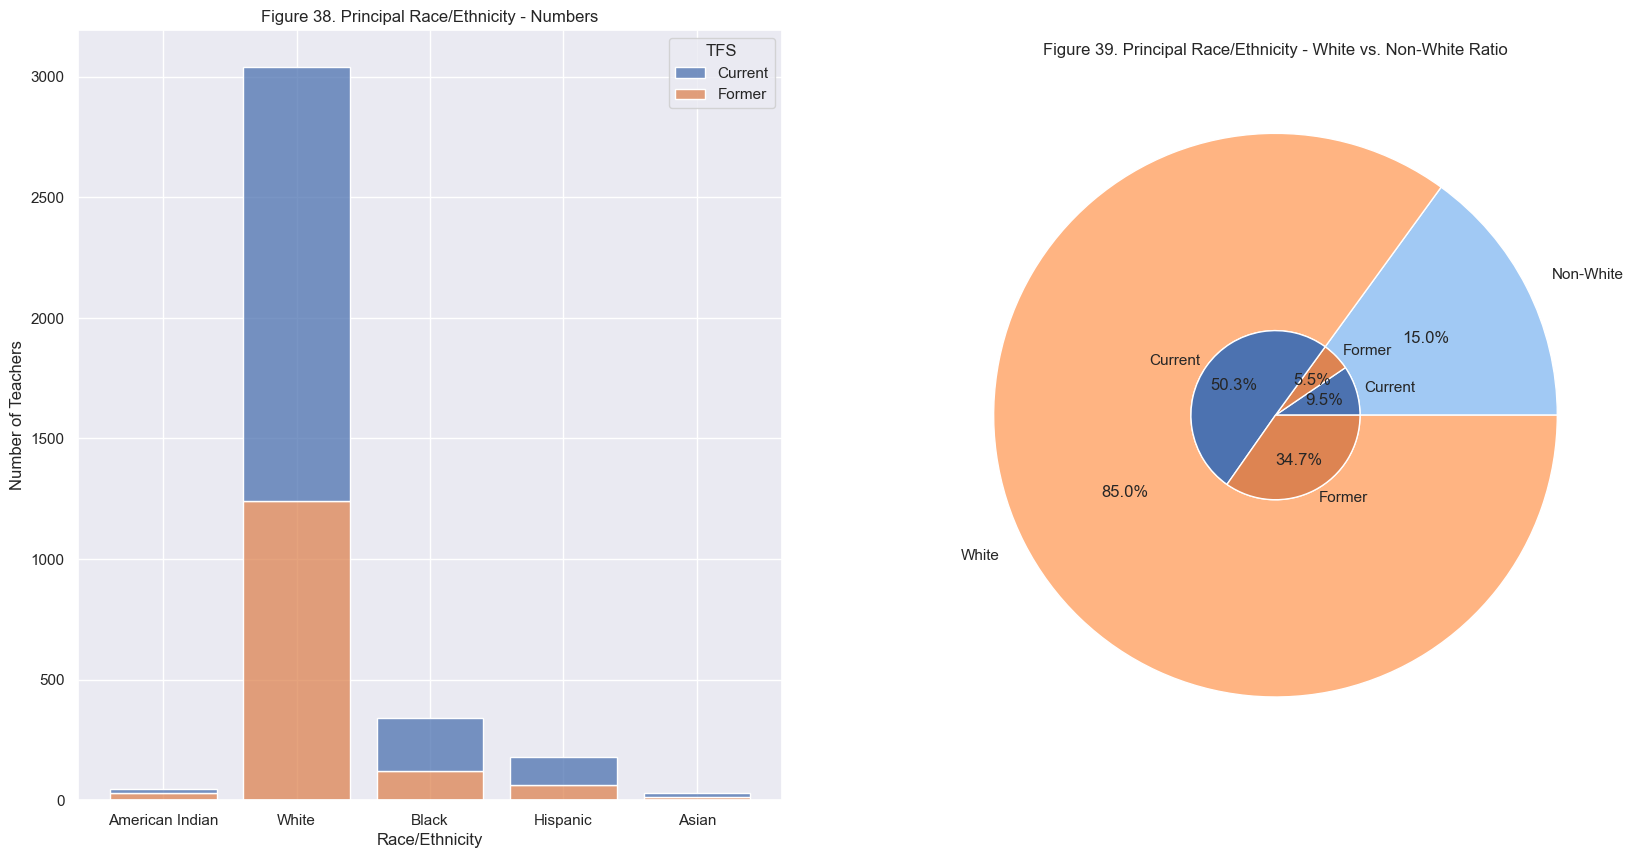

In [38]:
fig, axes=plt.subplots(1,2, figsize=(20,10))
size=0.7

colors=sns.color_palette('husl')[:gender.A0227.nunique()]
axes[0].pie(gender.total.unique().tolist(), labels=gender.A0227.unique().tolist(), colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[0].pie(gender.CNTLNUM_T.tolist(), labels=gender.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[0].set(title='Figure '+str(fig_index)+'. Principal Gender')
fig_index+=1

colors=sns.color_palette('pastel')[:age.AGE_P.nunique()]
axes[1].pie(age.total.unique().tolist(), labels=age.AGE_P.unique().tolist(), colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[1].pie(age.CNTLNUM_T.tolist(), labels=age.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[1].set(title='Figure '+str(fig_index)+'. Principal Age')
fig_index+=1

fig, axes=plt.subplots(1,2, figsize=(20,10))
sns.histplot(ax=axes[0], data=df, x='raceth_p_txt', hue='TFS', multiple='stack', hue_order=['Current', 'Former'], shrink=0.8)#multiple='fill'
axes[0].set(xlabel='Race/Ethnicity', ylabel='Number of Teachers', title='Figure '+str(fig_index)+'. Principal Race/Ethnicity - Numbers')
fig_index+=1

colors=sns.color_palette('pastel')[:white.white_p_txt.nunique()]
axes[1].pie(white.total.unique().tolist(), labels=white.white_p_txt.unique().tolist(), colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[1].pie(white.CNTLNUM_T.tolist(), labels=white.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[1].set(title='Figure '+str(fig_index)+'. Principal Race/Ethnicity - White vs. Non-White Ratio')
fig_index+=1

plt.show()

- Figure 36: Female principals have smaller population than Male principals, however, their school teachers retention rate is higher.

- Figure 37: Teachers have their principal who is 45-54 years old the most, and their turnover is similar regardless of their principals age.

- Figure 38: The majority of teachers have White principal, and Black, Hispanic principals are following.

- Figure 39: While White principals comprise the administrative position, the retention rate is higher for Non-White principals.

###  degree, salary ###

In [39]:
category={1: 'Associate', 2: 'Bachelors', 3: 'Masters', 4: 'Education specialist or\nprofessional diploma', 5: 'Doctorate or\nfirst professional degree'}
degree_p=df.groupby(['A0225', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
degree_p['total']=degree_p.groupby('A0225').transform(lambda x: x.sum())['CNTLNUM_T']
degree_p['A0225']=degree_p['A0225'].map(category)

category={1: 'Less than $49,000', 2: '\$49,000-$59,999', 3: '\$60,000-$69,999', 4: '\$70,000-$79,999', 5: '\$80,000-$89,999', 6: '\$90,000 or more'}
salary=df.groupby(['A0226', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
salary['total']=salary.groupby('A0226').transform(lambda x: x.sum())['CNTLNUM_T']
salary['A0226']=salary['A0226'].map(category)

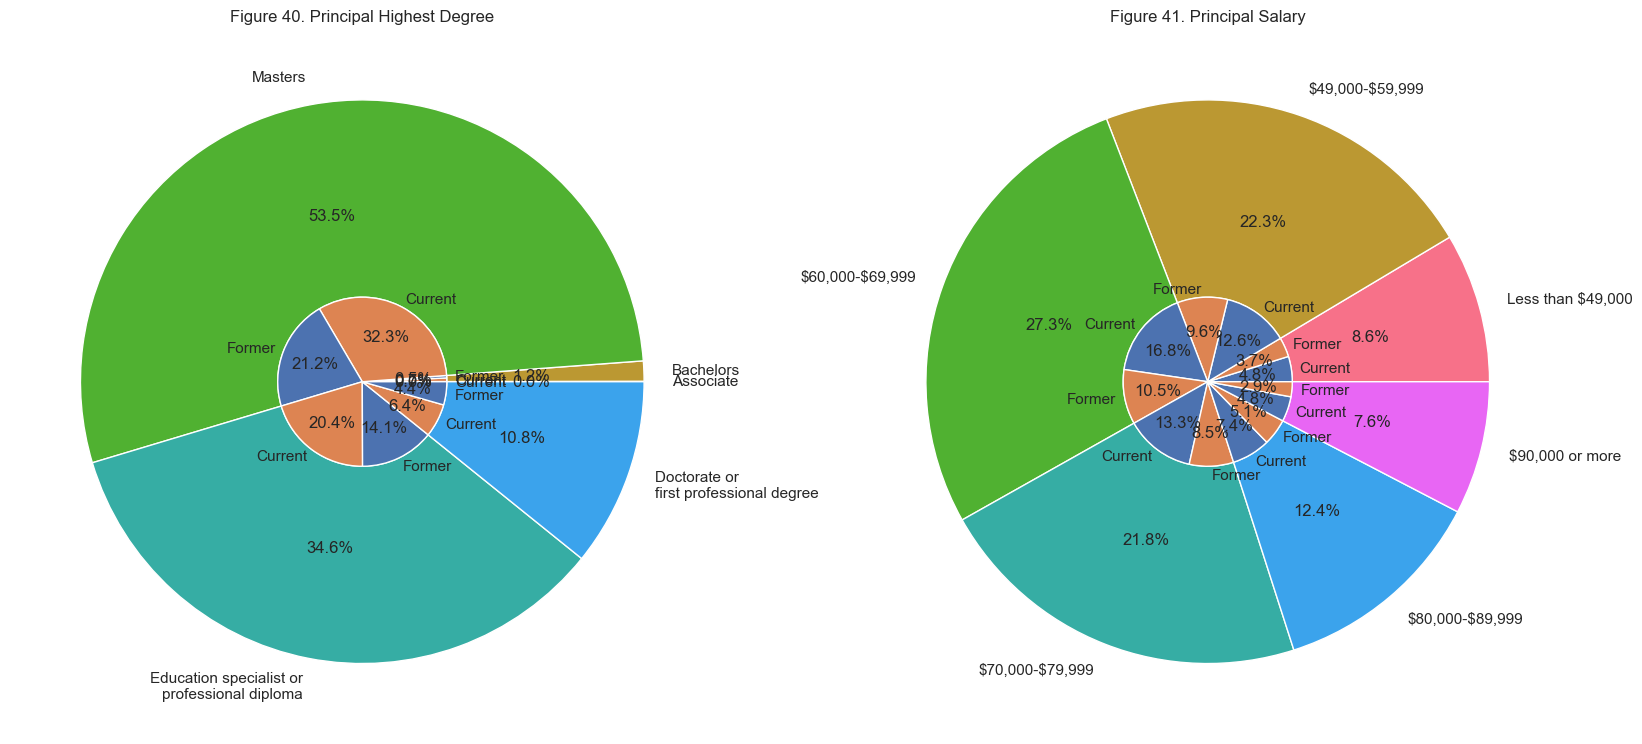

In [40]:
fig, axes=plt.subplots(1,2, figsize=(20,10))
size=0.7

colors=sns.color_palette('husl')[:degree_p.A0225.nunique()]
axes[0].pie(degree_p.total.unique().tolist(), labels=degree_p.A0225.unique().tolist(), colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[0].pie(degree_p.CNTLNUM_T.tolist(), labels=degree_p.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[0].set(title='Figure '+str(fig_index)+'. Principal Highest Degree')
fig_index+=1

colors=sns.color_palette('husl')[:salary.A0226.nunique()]
axes[1].pie(salary.total.unique().tolist(), labels=salary.A0226.unique().tolist(), colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[1].pie(salary.CNTLNUM_T.tolist(), labels=salary.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[1].set(title='Figure '+str(fig_index)+'. Principal Salary')
fig_index+=1

plt.show()

- Figure 40: While almost all principals have more education than bachelor’s degree, the retention rate is stable for all categories of degrees.

- Figure 41: The majority of principals have their salary range between $49K to $60K, the ratio of Current teachers rises gradually as the salary range increases.

## Public Principal: Teaching and Training ##
### years of experience ###

In [41]:
yrs_p_this=df.groupby(['A0053', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
yrs_p_oth=df.groupby(['A0054', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})

yrs_p_this['School_Employed']='This School'
yrs_p_oth['School_Employed']='Other Schools'
yrs_p_this.rename(columns={'A0053': 'years'}, inplace=True)
yrs_p_oth.rename(columns={'A0054': 'years'}, inplace=True)
yrs_p=pd.concat([yrs_p_this, yrs_p_oth], ignore_index=True)

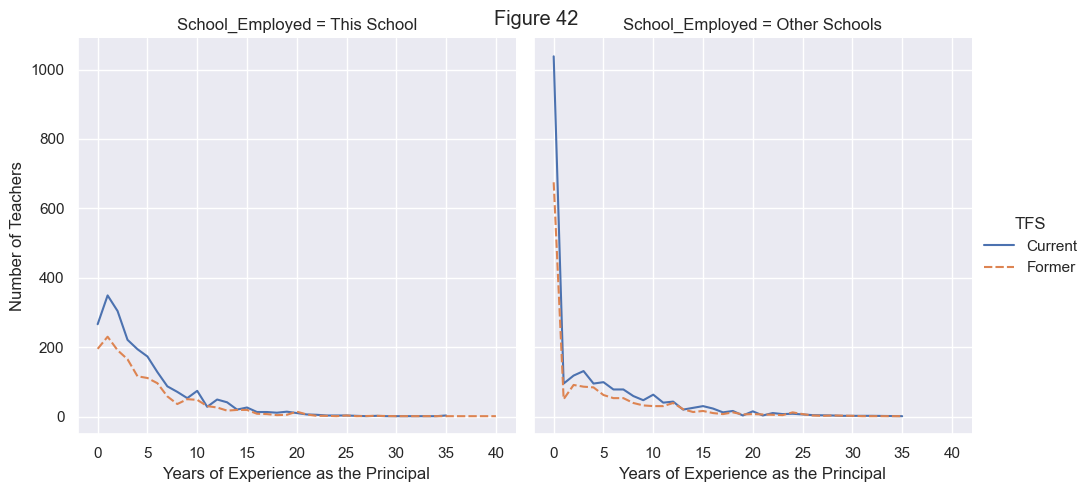

In [42]:
sns.set(rc={'figure.figsize':(20,10)})

fig=sns.relplot(data=yrs_p, x='years', y='CNTLNUM_T', col='School_Employed', hue='TFS', style='TFS', kind='line', hue_order=['Current', 'Former'])
fig.set(xlabel='Years of Experience as the Principal', ylabel='Number of Teachers')
fig.fig.suptitle('Figure '+str(fig_index))
fig_index+=1
plt.show()

Figure 42 indicates the number of teachers having a principal with the years of experience as the principal at This schools, on the left side, and at the Other schools on the right side. The fluctuation of the years shows the similar pattens for both Former and Current teachers at This and Other schools. However, the peak poluation of Former teachers appears when the principal's experience at This school is 1 year, and the same principal's experience at Other schools is 0 year. That means the teachers are likely leaving when they have new principal with no previous working experience as a principal.

In [43]:
yrs_tch_bf=df.groupby(['A0055', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
yrs_tch_af=df.groupby(['A0056', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})

yrs_tch_bf['Teaching_Experience']='Before Principal'
yrs_tch_af['Teaching_Experience']='Since Principal'
yrs_tch_bf.rename(columns={'A0055': 'years'}, inplace=True)
yrs_tch_af.rename(columns={'A0056': 'years'}, inplace=True)
yrs_p_tch=pd.concat([yrs_tch_bf, yrs_tch_af], ignore_index=True)

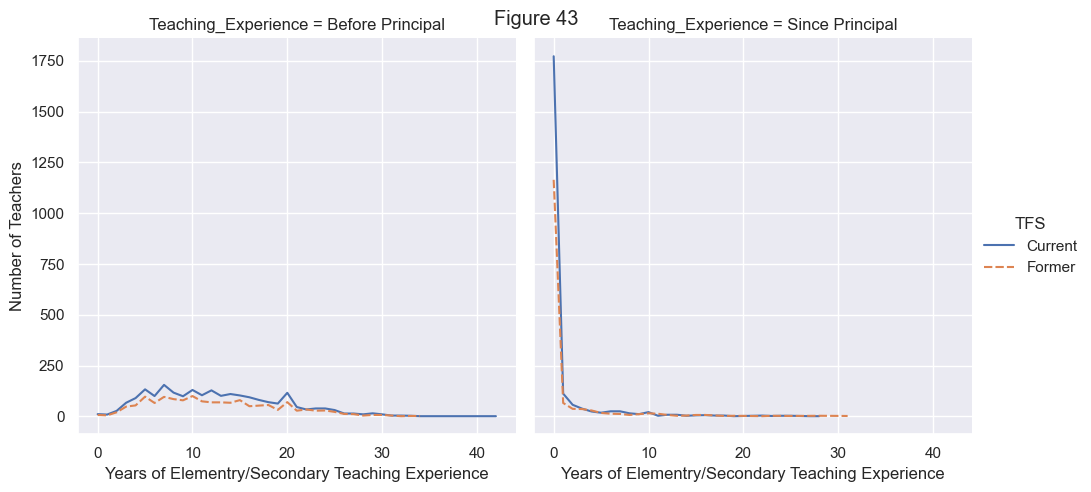

In [44]:
sns.set(rc={'figure.figsize':(20,10)})
fig=sns.relplot(data=yrs_p_tch, x='years', y='CNTLNUM_T', col='Teaching_Experience', hue='TFS', style='TFS', kind='line', hue_order=['Current', 'Former'])
fig.set(xlabel='Years of Elementry/Secondary Teaching Experience', ylabel='Number of Teachers')
fig.fig.suptitle('Figure '+str(fig_index))
fig_index+=1
plt.show()

The survey also aksed the principals whether they have teaching experience for elementry and secondary education before(left side of Figure 43) and since(right side of Figure 44) they became a principal. The figure also shows the similar fluctuation of Former and Current teachers popluation as the years of their principal's teaching experience increase. But, the population of Former teachers is peaked when their principal is not teaching at all since they became the principal.

## Public District (available from Public School): Incentive Policy ## 

In [45]:
cols=['S1611', 'S1612', 'S1613', 'S1614']
incen=df.groupby(['S1611', 'S1612', 'S1613', 'S1614', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})

yes_out, yes_in, no_in, no_out = [], [], [], []

for c in cols:
    yes_out+=incen[incen[c]==1].groupby(c).transform(lambda x: x.sum())['CNTLNUM_T'].unique().tolist()
    yes_in+=incen[incen[c]==1].groupby('TFS').transform(lambda x: x.sum())['CNTLNUM_T'].unique().tolist()
    no_out+=incen[incen[c]==2].groupby(c).transform(lambda x: x.sum())['CNTLNUM_T'].unique().tolist()
    no_in+=incen[incen[c]==2].groupby('TFS').transform(lambda x: x.sum())['CNTLNUM_T'].unique().tolist()

labels_outer=['National Board Certification', 'Excellence in Teaching', 'Professional Development', 'Less Desirable Location']
labels_inner=['Current', 'Former', 'Current', 'Former', 'Current', 'Former', 'Current', 'Former']

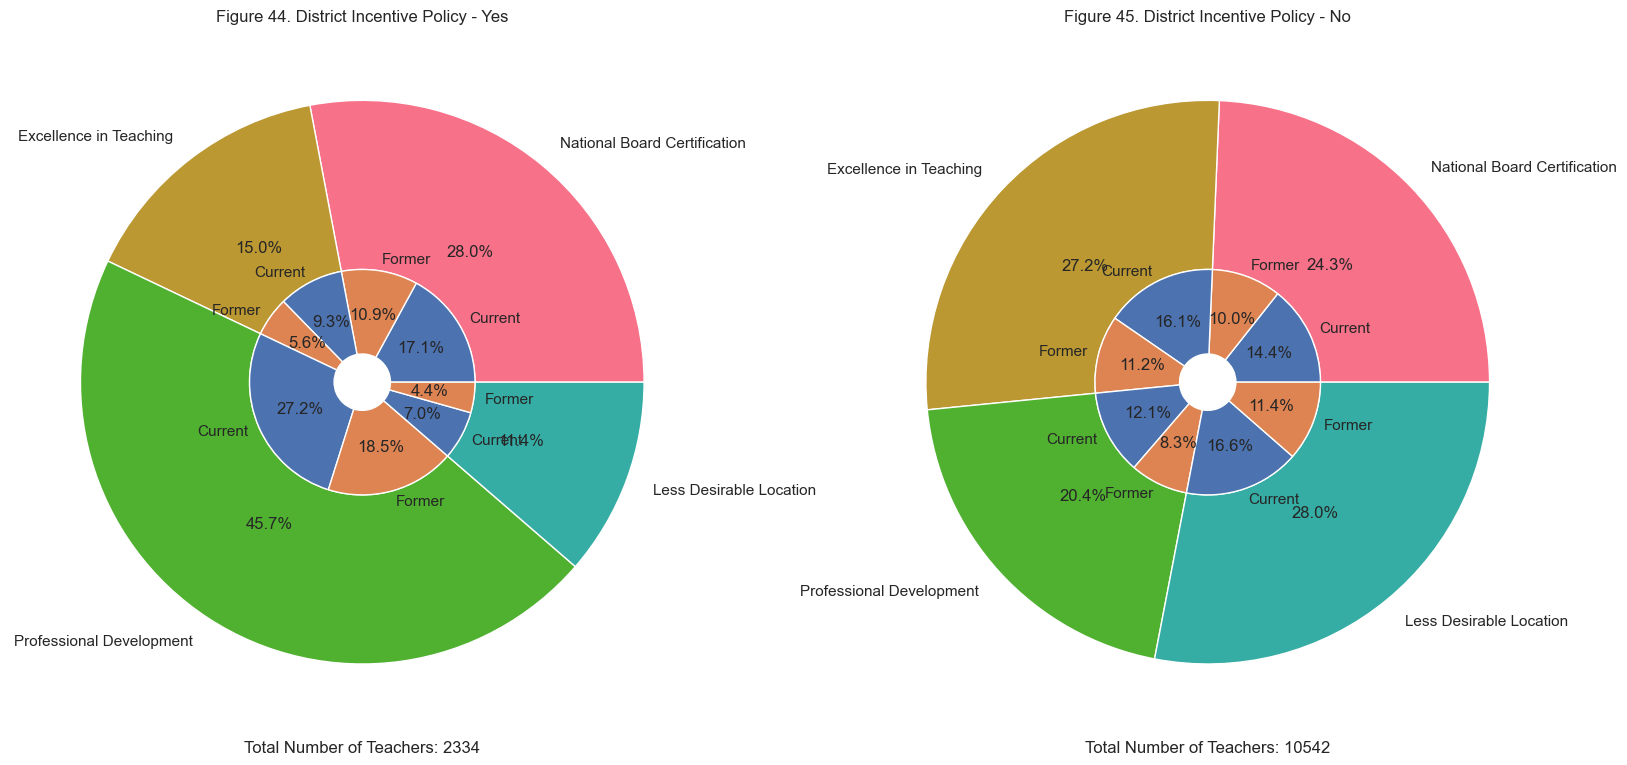

In [46]:
fig, axes=plt.subplots(1,2, figsize=(20,10))
size=0.6

colors=sns.color_palette('husl')[:len(yes_out)]
axes[0].pie(yes_out, labels=labels_outer, colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[0].pie(yes_in, labels=labels_inner, colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[0].set(title='Figure '+str(fig_index)+'. District Incentive Policy - Yes', xlabel='Total Number of Teachers: '+str(sum(yes_out)))
fig_index+=1

colors=sns.color_palette('husl')[:len(no_out)]
axes[1].pie(no_out, labels=labels_outer, colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[1].pie(no_in, labels=labels_inner, colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[1].set(title='Figure '+str(fig_index)+'. District Incentive Policy - No', xlabel='Total Number of Teachers: '+str(sum(no_out)))
fig_index+=1

plt.show()

Figure 44 and 45 reflect the ratio of teachers regarding question asking whether a district has any pay incentive policy – cash bonuses, salary increases - for their performance or development. Figure 44 indicates the districts with the incentive policy, and Figure 46 shows the ratio of teachers working in the districts with no such policy. Overall, both charts have around 60% of Current teachers throughout all four categories reward items. 

In [47]:
category={1: 'Yes', 2: 'No', -9: 'N/A'}
reten=df.groupby(['S1615', 'TFS'], as_index=False).agg({'CNTLNUM_T': 'count'})
reten['total']=reten.groupby('S1615').transform(lambda x: x.sum())['CNTLNUM_T']
reten.S1615=reten.S1615.map(category)

cols_non=['S1616', 'S1617', 'S1618', 'S1619', 'S1624', 'S1625', 'S1626', 'S1627']
cols_stem=[ 'S1620', 'S1621', 'S1622', 'S1623']

data=[]
data_stem=0

incen=df.groupby(cols_non+cols_stem, as_index=False).agg({'CNTLNUM_T': 'count'})

for c in cols_non:
    data.append(incen[incen[c]==1].CNTLNUM_T.sum())

for c in cols_stem:
    data_stem+=incen[incen[c]==1].CNTLNUM_T.sum()

data.append(data_stem)
labels=['General Elementary', 'Special Education', 'English', 'Social Studies', 'ESL', 'Foreign Languages', 'Music/Art', 'Vocational/Technical', 'STEM']

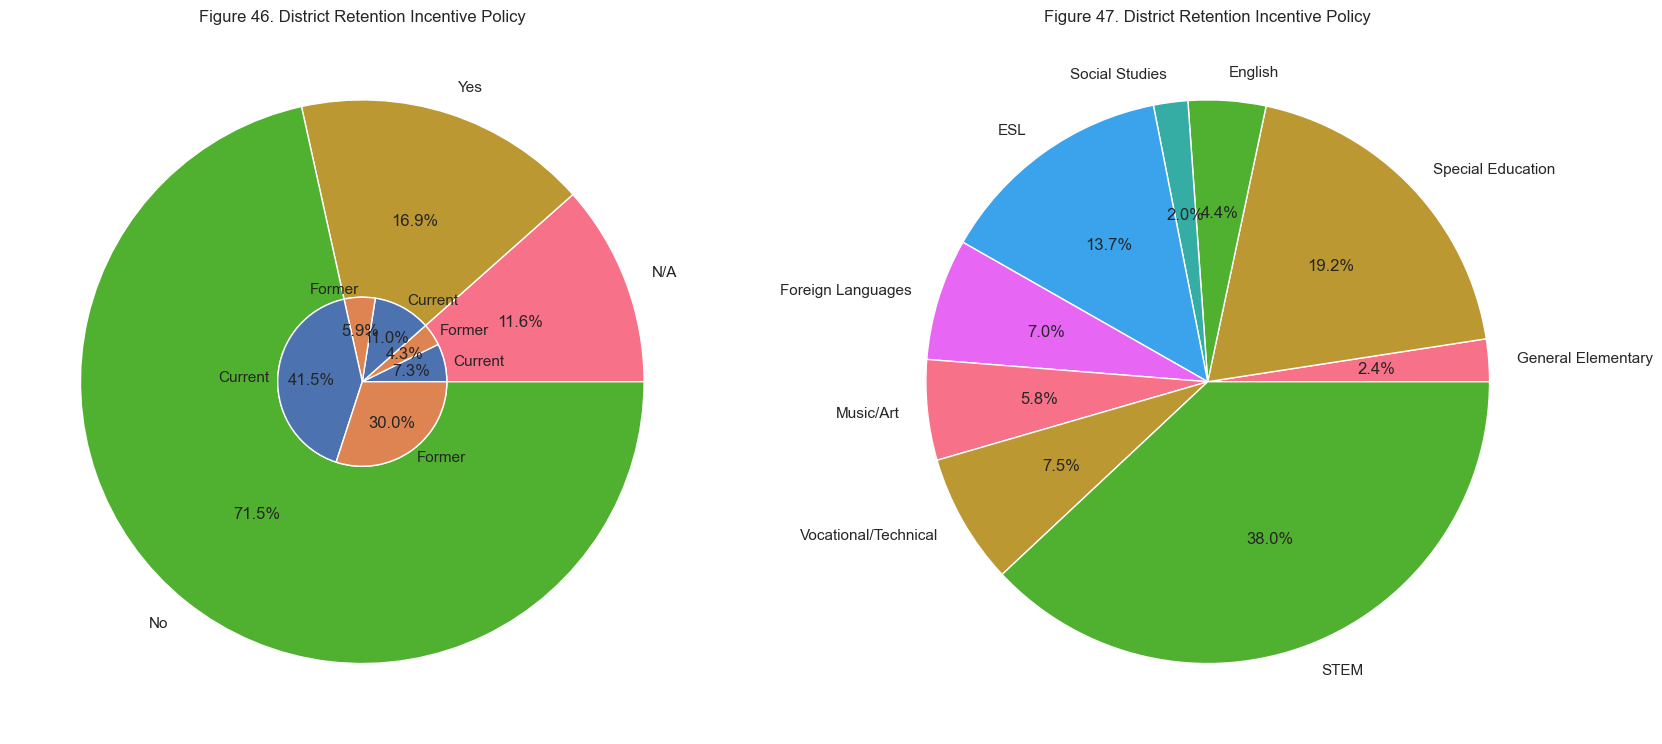

In [48]:
fig, axes=plt.subplots(1,2, figsize=(20,10))
size=0.7

colors=sns.color_palette('husl')[:reten.S1615.nunique()]
axes[0].pie(reten.total.unique().tolist(), labels=reten.S1615.unique().tolist(), colors=colors, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))
colors=sns.color_palette('deep')[0:2]
axes[0].pie(reten.CNTLNUM_T.tolist(), labels=reten.TFS.tolist(), colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
axes[0].set(title='Figure '+str(fig_index)+'. District Retention Incentive Policy')
fig_index+=1

colors=sns.color_palette('husl')[:len(data)]
axes[1].pie(data, labels=labels, colors=colors, autopct='%1.1f%%')#, wedgeprops=dict(width=size, edgecolor='w'))
axes[1].set(title='Figure '+str(fig_index)+'. District Retention Incentive Policy')
fig_index+=1

- Figure 46: While 17% of teachers working in the district having pay incentives to recruit or retain teachers in the field of shortage, those districts with the retention incentive policy have higher retention rate.

- Figure 47: Those districts providing the retention incentive policy have 12 different fields offering the incentives. STEM is the dominant field in the policy, and Special Education and ESL are following. STEM fields include Computer science, Mathematics, Physical sciences, and Biological/Life sciences.